В данном блокноте будет проанализирован датасет участников заключительного этапа Всероссийской олимпиады школьников по математике за период 2024-2014 год. Кроме 2020 года, так как в этом году олимпиада не проводилась из-за эпидемии COVID-19. Данный датасет был получен объединением таблиц с сайта https://olympiads.mccme.ru/vmo/ . Главной целью анализа является исследование успешности выступлений учеников из разных регионов на олимпиаде.

# Загрузка данных

In [147]:
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_string_dtype
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Ссылка на датасет в гугл диске: https://drive.google.com/file/d/1K9n3ZM_uO8N8B9MOhyPftZGvOuGt3vrB/view?usp=sharing

In [148]:
!gdown 1K9n3ZM_uO8N8B9MOhyPftZGvOuGt3vrB

Downloading...
From: https://drive.google.com/uc?id=1K9n3ZM_uO8N8B9MOhyPftZGvOuGt3vrB
To: /content/math_2024_2014_dataset.csv
100% 1.10M/1.10M [00:00<00:00, 11.7MB/s]


In [149]:
df_raw = pd.read_csv("math_2024_2014_dataset.csv")

# Обзор данных

In [150]:
df = df_raw.copy()

In [151]:
df.head()

,Имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады
0,Кокарев И.А.,Челябинская область,9,NaN,NaN,42,Победитель,2024
1,Штурман А.А.,Ярославская область,9,NaN,NaN,42,Победитель,2024
2,Скворцов А.М.,г. Санкт-Петербург,9,NaN,NaN,41,Победитель,2024
3,Карпов С.А.,Курганская область,9,NaN,NaN,37,Призёр,2024
4,Кузнецов И.А.,г. Санкт-Петербург,9,NaN,NaN,37,Призёр,2024


Описание датасета:  


*   **Имя** : Имя участника.
*   **Субъект РФ** : Регион, от которого участник выступает на олимпиаде.
*   **Класс участия** : Класс за который участник пишет олимпиаду. Олимпиада проводится для 9/10/11 класса. Участник может участвовать в олимпиаде за тот класс в котором он обучается или более старший.
*   **Класс обучения** : Класс в котором участник обучается в школе.
*   **Образовательное учреждение** : Школа в которой обучается участник.
*   **Баллы** : Количество баллов, которое набрал участник на олимпиаде. Максимальное количество баллов - 56.
*   **Статус** : Результат выступления на олимпиаде. Есть 4 категории: участник, похвальная грамота, призёр, победитель. Категория похвальная грамота присуждается ученикам, которым немного не хватило баллов для получения диплома призёра. Но формально ученик со статусом участника и похвальной грамотой не отличаются.
*   **Год олимпиады** : Год олимпиады, в которой участвовал ученик. В данном датасете рассматривается промежуток 2014 - 2024, кроме 2020 года. Так как в том году олимпиада не проводилась из-за эпидемии COVID-19.

In [152]:
df.sample(n=20, random_state=2)

,Имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады
2450,Хаялеев Тагир Радикович,Республика Татарстан (Татарстан),10,10.0,Муниципальное автономное общеобразовательное у...,34,призер,2018
1404,Цаголов Георгий Зарубекович,Республика Северная Осетия - Алания,11,NaN,Муниципальное бюджетное общеобразовательное уч...,7,Участник,2022
3733,Макаров Михаил Владимирович,Удмуртская Республика,10,NaN,Муниципальное бюджетное общеобразовательное уч...,28,Похвальная грамота,2015
2658,Кощеев Илья Алексеевич,Кировская область,11,11.0,муниципальное общеобразовательное автономное у...,19,Участник,2018
1489,Ильин Тимофей,Краснодарский край,9,NaN,NaN,22,Похвальная грамота,2021
248,Петросян А.Г.,Орловская область,10,NaN,NaN,17,Участник,2024
1830,Гладченко Алиса,Москва,11,NaN,NaN,28,Призер,2021
488,Пименов Марк Владимирович,г. Москва,9,9.0,Государственное бюджетное профессиональное обр...,34,Призёр,2023
3132,Кравченко Егор Андреевич,Санкт-Петербург,9,NaN,Государственное бюджетное общеобразовательное ...,21,Участник,2016
3943,Алексеев Максим Евгеньевич,г. Москва,10,10.0,Государственное бюджетное образовательное учре...,29,Участник,2014


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Имя                         4123 non-null   object 
 1   Субъект РФ                  4123 non-null   object 
 2   Класс участия               4123 non-null   int64  
 3   Класс обучения              1575 non-null   float64
 4   Образовательное учреждение  3136 non-null   object 
 5   Баллы                       4123 non-null   int64  
 6   Статус                      4123 non-null   object 
 7   Год олимпиады               4123 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 257.8+ KB


Из обзора данных видно несколько проблем, которые предстоит решить при предобработке данных:  


1.   Разный формат имён в колонке **Имя**
2.   Разный формат субъектов в колонке **Субъект РФ**
3.   Пропуски в классах обучения и неправильный числовой формат в колонке **Класс обучения**
4.   Пропуски в образовательных учреждениях в колонке **Образовательное учреждение**
5.   Разный формат статуса школьника в колонке **Статус**

Разные форматы нужно привести к единому, и при необходимости создать дополнительные колонки. Также нужно заполнить пропуски, если имеется возможность это сделать


# Предобработка данных

## Субъект РФ

Посмотрим какие есть значения в колонке **Субъект РФ**

In [154]:
df['Субъект РФ'].value_counts()

,count
Субъект РФ,
г. Москва,773
Москва,545
г. Санкт-Петербург,292
Санкт-Петербург,240
Республика Татарстан,193
...,...
Карачаево- Черкесская Республика,1
Ямало-Ненецкий автономный округ,1
"Астрахань, Астраханская область",1


Видно, что есть повторения связанные с разным форматом записи субъекта. Преобразуем их к единому формату

In [155]:
subjects_rf = {
    # Города федерального значения
    "Москва": "Москва",
    "Петербург": "Санкт-Петербург",
    "СПб": "Санкт-Петербург",
    "Севастополь": "Севастополь",

    # Республики
    "Адыгея": "Республика Адыгея",
    "Алтай": "Республика Алтай",
    "Башкортостан": "Республика Башкортостан",
    "Бурятия": "Республика Бурятия",
    "Дагестан": "Республика Дагестан",
    "ДНР": "Донецкая Народная Республика",
    "Ингушетия": "Республика Ингушетия",
    "Кабардино": "Кабардино-Балкарская Республика",
    "Калмыкия": "Республика Калмыкия",
    "Карачаево": "Карачаево-Черкесская Республика",
    "Карелия": "Республика Карелия",
    "Коми": "Республика Коми",
    "Крым": "Республика Крым",
    "Марий Эл": "Республика Марий Эл",
    "Мордовия": "Республика Мордовия",
    "Якутия": "Республика Саха (Якутия)", "Республика Саха": "Республика Саха (Якутия)",
    "Северная Осетия": "Республика Северная Осетия — Алания",
    "Татарстан": "Республика Татарстан", "Казань": "Республика Татарстан",
    "Тыва": "Республика Тыва",
    "Удмуртская": "Удмуртская Республика",
    "Хакасия": "Республика Хакасия",
    "Чеченская": "Чеченская Республика",
    "Чувашская": "Чувашская Республика",
    "Луганская": "Луганская Народная Республика",

    # Края
    "Алтайский": "Алтайский край",
    "Забайкальский": "Забайкальский край",
    "Камчатский": "Камчатский край",
    "Краснодарский": "Краснодарский край",
    "Красноярский": "Красноярский край",
    "Пермский": "Пермский край",
    "Приморский": "Приморский край",
    "Ставропольский": "Ставропольский край",
    "Хабаровский": "Хабаровский край",

    # Области
    "Амурская": "Амурская область",
    "Архангельская": "Архангельская область",
    "Астраханская": "Астраханская область",
    "Белгородская": "Белгородская область",
    "Брянская": "Брянская область",
    "Владимирская": "Владимирская область",
    "Волгоградская": "Волгоградская область",
    "Вологодская": "Вологодская область",
    "Воронежская": "Воронежская область",
    "Ивановская": "Ивановская область",
    "Иркутская": "Иркутская область",
    "Калининградская": "Калининградская область",
    "Калужская": "Калужская область",
    "Кемеровская": "Кемеровская область — Кузбасс",
    "Кировская": "Кировская область",
    "Костромская": "Костромская область",
    "Курганская": "Курганская область",
    "Курская": "Курская область",
    "Ленинградская": "Ленинградская область",
    "Липецкая": "Липецкая область",
    "Магаданская": "Магаданская область",
    "Московская": "Московская область",
    "Мурманская": "Мурманская область",
    "Нижегородская": "Нижегородская область",
    "Новгородская": "Новгородская область",
    "Новосибирская": "Новосибирская область",
    "Омская": "Омская область",
    "Оренбургская": "Оренбургская область",
    "Орловская": "Орловская область",
    "Пензенская": "Пензенская область",
    "Псковская": "Псковская область",
    "Ростовская": "Ростовская область",
    "Рязанская": "Рязанская область",
    "Самарская": "Самарская область",
    "Саратовская": "Саратовская область",
    "Сахалинская": "Сахалинская область",
    "Свердловская": "Свердловская область",
    "Смоленская": "Смоленская область",
    "Тамбовская": "Тамбовская область",
    "Тверская": "Тверская область",
    "Томская": "Томская область",
    "Тульская": "Тульская область",
    "Тюменская": "Тюменская область",
    "Ульяновская": "Ульяновская область",
    "Челябинская": "Челябинская область",
    "Ярославская": "Ярославская область",
    "Запорожская": "Запорожская область",
    "Херсонская": "Херсонская область",

    # Автономные округа
    "Ненецкий автономный округ": "Ненецкий автономный округ",
    "Ханты": "Ханты-Мансийский автономный округ — Югра", "ХМАО": "Ханты-Мансийский автономный округ — Югра",
    "Чукотский": "Чукотский автономный округ",
    "Ямало-Ненецкий": "Ямало-Ненецкий автономный округ", "ЯНАО": "Ямало-Ненецкий автономный округ",

    # Автономная область
    "Еврейская": "Еврейская автономная область",

    "ФТ «Сириус»": 'Федеральная территория "Сириус"'
}

In [156]:
for key in subjects_rf:
  df.loc[df['Субъект РФ'].str.contains(key), 'Субъект РФ'] = subjects_rf[key]

In [157]:
df['Субъект РФ'].value_counts()

,count
Субъект РФ,
Москва,1318
Санкт-Петербург,614
Республика Татарстан,306
Московская область,134
Удмуртская Республика,109
...,...
Луганская Народная Республика,2
Донецкая Народная Республика,2
Республика Ингушетия,1


## Статус


In [158]:
df['Статус'].value_counts()

,count
Статус,
Участник,1673
Призер,650
Похвальная грамота,441
Призёр,411
призер,269
участник,212
Победитель,154
Призëр,117
победитель,51


Приведем статусы к единому формату: участник, похвальная грамота, призер, победитель

In [159]:
status_mapping = {
    "Участник": "участник",
    "участник": "участник",
    "Призер": "призер",
    "Призёр": "призер",
    "призер": "призер",
    "призёр": "призер",
    "Победитель": "победитель",
    "победитель": "победитель",
    "ПГ": "похвальная грамота",
    "Похвальная грамота": "похвальная грамота",
    "похвальная грамота": "похвальная грамота",
    "Похвальный диплом": "похвальная грамота",
    "похвальный диплом": "похвальная грамота",
}

In [160]:
def normalize_status(status):
    for key in status_mapping:
        if key in status.strip():
            return status_mapping[key]
    return 'участник'

In [161]:
df['Статус'] = df['Статус'].str.replace("ë", "ё") # буква ё прочиталась как латинская буква е с двумя точками

In [162]:
df['Статус'] = df['Статус'].map(normalize_status)

In [163]:
df['Статус'].value_counts()

,count
Статус,
участник,1886
призер,1450
похвальная грамота,563
победитель,224


## Имя

Посмотрим в каких форматах есть имена

In [164]:
df['Имя'].sample(n=20, random_state=2)

,Имя
2450,Хаялеев Тагир Радикович
1404,Цаголов Георгий Зарубекович
3733,Макаров Михаил Владимирович
2658,Кощеев Илья Алексеевич
1489,Ильин Тимофей
248,Петросян А.Г.
1830,Гладченко Алиса
488,Пименов Марк Владимирович
3132,Кравченко Егор Андреевич
3943,Алексеев Максим Евгеньевич


Имя написано в трёх форматах:


1.   Фамилия Имя Отчество
2.   Фамилия Имя
3.   Фамилия И.О.

Создадим колонки отдельно для фамилии, имени и отчества, и там где они есть, заполним их.

In [165]:
def name_correct(full_name):
  full_name_splitted = full_name.split()
  if len(full_name_splitted) == 3:
    return full_name_splitted
  elif len(full_name_splitted) == 2:
    if full_name_splitted[1][-1] != '.':
      return [full_name_splitted[0], full_name_splitted[1], pd.NA]
    else:
      name_patr = full_name_splitted[1].split('.')
      return  [full_name_splitted[0], name_patr[0], name_patr[1] if name_patr[1] != '' else pd.NA]


In [166]:
df_names_list = df['Имя'].map(name_correct).copy()

In [167]:
df_names_list[df_names_list.isna()]

,Имя
3463,None
3848,None
3873,None


In [168]:
df['Имя'][3463], df['Имя'][3848], df['Имя'][3873]

('Багиров Фарид Вугар оглы', 'Нгуен Хюи Чыонг Нам', 'Фазли Моазам Джан Карим')

Эти имена отличаются по структуре, но их мало.

In [169]:
df_names_list.loc[3463] = ['Багиров', 'Фарид', 'Вугар оглы']
df_names_list.loc[3848] = ['Нгуен', 'Чыонг Нам', 'Хюи']
df_names_list.loc[3873] = ['Фазли', 'Карим', 'Моазам Джан']

In [170]:
df = df.rename(columns={"Имя": "Полное имя"})

In [171]:
df['Фамилия'] = df_names_list.map(lambda x: x[0])
df['Имя'] = df_names_list.map(lambda x: x[1])
df['Отчество'] = df_names_list.map(lambda x: x[2])

In [172]:
df.head()

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
0,Кокарев И.А.,Челябинская область,9,NaN,NaN,42,победитель,2024,Кокарев,И,А
1,Штурман А.А.,Ярославская область,9,NaN,NaN,42,победитель,2024,Штурман,А,А
2,Скворцов А.М.,Санкт-Петербург,9,NaN,NaN,41,победитель,2024,Скворцов,А,М
3,Карпов С.А.,Курганская область,9,NaN,NaN,37,призер,2024,Карпов,С,А
4,Кузнецов И.А.,Санкт-Петербург,9,NaN,NaN,37,призер,2024,Кузнецов,И,А


Проверим фамилии на дубликаты

In [173]:
df[['Полное имя', 'Год олимпиады', 'Субъект РФ', 'Фамилия', 'Имя']][df['Фамилия'].duplicated(keep=False)].sort_values(by='Фамилия')

,Полное имя,Год олимпиады,Субъект РФ,Фамилия,Имя
2945,Абдрахманов Марат Махмутович,2017,Челябинская область,Абдрахманов,Марат
3559,Абдрахманов Марат Махмутович,2015,Челябинская область,Абдрахманов,Марат
3042,Абдрахманов Марат Махмутович,2016,Челябинская область,Абдрахманов,Марат
2554,Абдрахманов Марат Махмутович,2018,Челябинская область,Абдрахманов,Марат
596,Абзалилов Артур Дамирович,2023,Республика Татарстан,Абзалилов,Артур
...,...,...,...,...,...
578,Ятченко Кирилл Вячеславович,2023,Курганская область,Ятченко,Кирилл
458,Яшкин Р.А.,2024,Ямало-Ненецкий автономный округ,Яшкин,Р
782,Яшкин Роберт Алексеевич,2023,Ямало-Ненецкий автономный округ,Яшкин,Роберт
361,Ящук А.И.,2024,Калининградская область,Ящук,А


Видно, что есть много учеников, которые участвовали несколько раз. Но их полные имена могут отличаться из-за разных форматов написания имён. Определим в каких годах форматы имён отличаются от формата Фамилия Имя Отчество.

In [174]:
df[(df['Имя'].str.len() == 1)]['Год олимпиады'].value_counts()

,count
Год олимпиады,
2024,471


In [175]:
df[(df['Отчество'].str.len() == 1)]['Год олимпиады'].value_counts()

,count
Год олимпиады,
2024,469


In [176]:
df[(df['Отчество'].isna())]['Год олимпиады'].value_counts()

,count
Год олимпиады,
2021,515
2024,2
2023,1
2019,1
2018,1


Пропущенные отчества из годов кроме 2021:

In [177]:
df[(df['Отчество'].isna()) & (df['Год олимпиады'] != 2021)]

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
7,Ровинский К..,Москва,9,NaN,NaN,35,призер,2024,Ровинский,К,<NA>
181,Запольски М..,Москва,10,NaN,NaN,30,призер,2024,Запольски,М,<NA>
497,Запольски Мишель,Москва,9,9.0,Государственное бюджетное общеобразовательное ...,30,призер,2023,Запольски,Мишель,<NA>
1951,Бердников Сергей,Москва,11,11.0,Федеральное государственное бюджетное образова...,32,призер,2019,Бердников,Сергей,<NA>
2537,Че Андрей,Москва,10,10.0,Лицей Национального исследовательского универс...,15,участник,2018,Че,Андрей,<NA>


In [178]:
df[df['Фамилия'].isin(np.array(df[(df['Отчество'].isna()) & (df['Год олимпиады'] != 2021)]['Фамилия']))]


,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
7,Ровинский К..,Москва,9,NaN,NaN,35,призер,2024,Ровинский,К,<NA>
181,Запольски М..,Москва,10,NaN,NaN,30,призер,2024,Запольски,М,<NA>
497,Запольски Мишель,Москва,9,9.0,Государственное бюджетное общеобразовательное ...,30,призер,2023,Запольски,Мишель,<NA>
1951,Бердников Сергей,Москва,11,11.0,Федеральное государственное бюджетное образова...,32,призер,2019,Бердников,Сергей,<NA>
2537,Че Андрей,Москва,10,10.0,Лицей Национального исследовательского универс...,15,участник,2018,Че,Андрей,<NA>


Других записей с заполненными отчествами нет. Скорее всего у них отчество просто не указано или отсутствует. Заполним пустыми строками

In [179]:
df.loc[(df['Отчество'].isna()) & (df['Год олимпиады'] != 2021), 'Отчество'] = ''

Для удобства обработки пропущенные отчества из 2021 года тоже заполним пропусками. Потом возможно, некоторые из них удастся восстановить

In [180]:
df['Отчество'] = df['Отчество'].fillna('')

Далее нужно заполнить имена из 2024 года. Можно найти участников с той же фамилией и первой буквой имени и первой буквой отчества, при условии, что класс участия не увеличивается.

In [181]:
name_count = 0
for ind, row in df[df['Год олимпиады'] == 2024].iterrows():
  surname = row['Фамилия']
  name_letter = row['Имя']
  patr_letter = row['Отчество']
  grade_participate = row['Класс участия']
  duplicate_check = df[
      (df['Фамилия'] == surname) & (df['Имя'].map(lambda x: x[0]) == name_letter) & (df['Класс участия'] <= grade_participate) &
      (df['Отчество'].map(lambda x: x[:1]) == patr_letter) & (df['Год олимпиады'] != 2024)]
  if not duplicate_check.empty:
    df.loc[ind, 'Имя'] = duplicate_check.iloc[0]['Имя']
    df.loc[ind, 'Отчество'] = duplicate_check.iloc[0]['Отчество']
    name_count += 1
print(f'Восстановлено {name_count} имен')

Восстановлено 247 имен


In [182]:
df.head()

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
0,Кокарев И.А.,Челябинская область,9,NaN,NaN,42,победитель,2024,Кокарев,Иван,Андреевич
1,Штурман А.А.,Ярославская область,9,NaN,NaN,42,победитель,2024,Штурман,Арсений,Александрович
2,Скворцов А.М.,Санкт-Петербург,9,NaN,NaN,41,победитель,2024,Скворцов,Александр,Михайлович
3,Карпов С.А.,Курганская область,9,NaN,NaN,37,призер,2024,Карпов,С,А
4,Кузнецов И.А.,Санкт-Петербург,9,NaN,NaN,37,призер,2024,Кузнецов,Иван,Александрович


При этом не рассматривались ученики, у которых отчество не заполнено, т.е. в 2021 году. Посмотрим, много ли таких учеников, у которых совпадает фамилия и первая буква имени, но отчество пропущено

In [183]:
for ind, row in df[df['Год олимпиады'] == 2024].iterrows():
  surname = row['Фамилия']
  name_letter = row['Имя'] # для заполненных данных полное имя, дня незаполненных - одна буква
  patr_letter = row['Отчество']
  grade_participate = row['Класс участия']
  duplicate_check = df[
      (df['Фамилия'] == surname) & (df['Имя'].map(lambda x: x[0]) == name_letter) & (df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] == 2021)]
  if not duplicate_check.empty:
    display(row.to_frame().T)
    display(duplicate_check)

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
339,Иванов К.Д.,Москва,11,NaN,NaN,35,призер,2024,Иванов,К,Д


,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
1642,Иванов Кирилл,Тюменская область,10,NaN,NaN,25,похвальная грамота,2021,Иванов,Кирилл,


,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
423,Тимофеев В.И.,Красноярский край,11,NaN,NaN,23,участник,2024,Тимофеев,В,И


,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
1633,Тимофеев Валерий,Санкт-Петербург,10,NaN,NaN,29,призер,2021,Тимофеев,Валерий,


В обоих случаях классы отличаются не сильно, хотя прошло 3 года и субъекты РФ различаются. Почти наверняка это разные люди, так что имена не заполняем. Таким образом все имена и отчества в 2024 году, которые могли быть восстановлены, были восстановлены

Восстановим отсутствующие отчества в 2021 году

In [184]:
df[df['Отчество'] == '']

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
7,Ровинский К..,Москва,9,NaN,NaN,35,призер,2024,Ровинский,К,
181,Запольски М..,Москва,10,NaN,NaN,30,призер,2024,Запольски,Мишель,
497,Запольски Мишель,Москва,9,9.0,Государственное бюджетное общеобразовательное ...,30,призер,2023,Запольски,Мишель,
1406,Згонник Илья,Санкт-Петербург,9,NaN,NaN,49,победитель,2021,Згонник,Илья,
1407,Кузнецов Роман,Санкт-Петербург,9,NaN,NaN,49,победитель,2021,Кузнецов,Роман,
...,...,...,...,...,...,...,...,...,...,...,...
1919,Карамаврова Алиса,Москва,11,NaN,NaN,0,участник,2021,Карамаврова,Алиса,
1920,Худяков Даниил,Забайкальский край,11,NaN,NaN,0,участник,2021,Худяков,Даниил,
1921,Шестаков Василий,Москва,11,NaN,NaN,0,участник,2021,Шестаков,Василий,
1951,Бердников Сергей,Москва,11,11.0,Федеральное государственное бюджетное образова...,32,призер,2019,Бердников,Сергей,


In [185]:
count = 0
for ind, row in df[df['Год олимпиады'] == 2021].iterrows():
  surname = row['Фамилия']
  name = row['Имя']
  grade_participate = row['Класс участия']
  duplicate_check = df[
      (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                         ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))]
  if not duplicate_check.empty:
    count += 1

In [186]:
count

328

Потенциальных совпадений довольно много. Но так как отчество отсутсвует, нельзя быть абсолютно уверенным что эти люди одни и те же. Обработаем большую часть данных исходя из следующих условий: Имя и фамилия должны совпадать, Субъект РФ должен совпадать, разница между первым и последним годом участия не больше двух(типичная ситуация когда ученик участвует в 9, 10 и 11 классах). При соблюдении этих условий, будем считать, что человек один и тот же. Остальные случаи обработаем позже

In [187]:
import warnings

In [188]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)
  for ind, row in df[df['Год олимпиады'] == 2021].iterrows():
    surname = row['Фамилия']
    name = row['Имя']
    grade_participate = row['Класс участия']
    region = row['Субъект РФ']
    duplicate_check = df[
        (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                           ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))
        & (df['Субъект РФ'] == region)]
    if not duplicate_check.empty:
      df_add = pd.concat([row.to_frame().T, duplicate_check]).sort_values(by='Год олимпиады')
      year_min, year_max  = df_add['Год олимпиады'].min(), df_add['Год олимпиады'].max()
      if year_max - year_min > 2:
        continue
      df.loc[ind, 'Отчество'] = duplicate_check.iloc[0]['Отчество']

In [189]:
df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].shape[0]

283

Около половины всех отчеств была заполнена. Теперь посмотрим, много ли осталось случаев, когда субъект может не совпадать, но количество участий типично

In [190]:
count = 0
df_gathered_2021 = pd.DataFrame()
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)
  for ind, row in df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].iterrows():
    surname = row['Фамилия']
    name = row['Имя']
    grade_participate = row['Класс участия']
    region = row['Субъект РФ']
    duplicate_check = df[
        (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                           ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))]
    if not duplicate_check.empty:
      df_add = pd.concat([row.to_frame().T, duplicate_check]).sort_values(by='Год олимпиады')
      year_min, year_max  = df_add['Год олимпиады'].min(), df_add['Год олимпиады'].max()
      if year_max - year_min > 2:
        continue
      df_gathered_2021 = pd.concat([df_gathered_2021, df_add])
      count += 1

In [191]:
count

23

Если такие люди одинаковые, то скорее всего они переехали из родного города в Москву. Проверим

In [192]:
count = 0
df_gathered_2021 = pd.DataFrame()
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)
  for ind, row in df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].iterrows():
    surname = row['Фамилия']
    name = row['Имя']
    grade_participate = row['Класс участия']
    region = row['Субъект РФ']
    duplicate_check = df[
        (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                           ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))]
    if not duplicate_check.empty:
      df_add = pd.concat([row.to_frame().T, duplicate_check]).sort_values(by='Год олимпиады')
      year_min, year_max  = df_add['Год олимпиады'].min(), df_add['Год олимпиады'].max()
      if year_max - year_min > 2:
        continue
      if df_add.iloc[0]['Субъект РФ'] == 'Москва':
        continue
      df_gathered_2021 = pd.concat([df_gathered_2021, df_add])
      count += 1

In [193]:
count

22

Действительно, только один человек не переехал из другого города в Москву, а в какой то другой. Такие переезды распространены. Поэтому почти наверняка, все такие люди являются одинаковыми. Заполним отчества

In [194]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)
  for ind, row in df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].iterrows():
    surname = row['Фамилия']
    name = row['Имя']
    grade_participate = row['Класс участия']
    region = row['Субъект РФ']
    duplicate_check = df[
        (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                           ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))]
    if not duplicate_check.empty:
      df_add = pd.concat([row.to_frame().T, duplicate_check]).sort_values(by='Год олимпиады')
      year_min, year_max  = df_add['Год олимпиады'].min(), df_add['Год олимпиады'].max()
      if year_max - year_min > 2:
        continue
      df.loc[ind, 'Отчество'] = duplicate_check.iloc[0]['Отчество']

In [195]:
df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].shape[0]

260

Далее рассмотрим оставшиеся наблюдения, когда количество участий нетипично, но разница в годах между выступлениями не больше 3. В этом случае вероятность того, что два ученика из одного субъекта участвовали в одном временном промежутке и имеют одинаковую фамилию и имя очень мала. Остальных скорее всего будет очень мало и их можно обработать отдельно. Пусть сначала субъект совпадает

In [196]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)
  for ind, row in df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].iterrows():
    surname = row['Фамилия']
    name = row['Имя']
    grade_participate = row['Класс участия']
    region = row['Субъект РФ']
    duplicate_check = df[
        (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                           ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))
        & (df['Субъект РФ'] == region)]
    if not duplicate_check.empty:
      df_add = pd.concat([row.to_frame().T, duplicate_check]).sort_values(by='Год олимпиады')
      year_min, year_max  = df_add['Год олимпиады'].min(), df_add['Год олимпиады'].max()
      if year_max - year_min > 3:
        continue
      df.loc[ind, 'Отчество'] = duplicate_check.iloc[0]['Отчество']

In [197]:
df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].shape[0]

205

Остальные ученики из этой выборки

In [198]:
df_gathered_2021 = pd.DataFrame()
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)
  for ind, row in df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].iterrows():
    surname = row['Фамилия']
    name = row['Имя']
    grade_participate = row['Класс участия']
    region = row['Субъект РФ']
    duplicate_check = df[
        (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                           ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))
        & (df['Субъект РФ'] == region)]
    if not duplicate_check.empty:
      df_add = pd.concat([row.to_frame().T, duplicate_check]).sort_values(by='Год олимпиады')
      df_gathered_2021 = pd.concat([df_gathered_2021, df_add])

In [199]:
df_gathered_2021

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
2198,Кузнецов Роман Владимирович,Санкт-Петербург,9,7.0,Государственное бюджетное общеобразовательное ...,33,призер,2019,Кузнецов,Роман,Владимирович
1407,Кузнецов Роман,Санкт-Петербург,9,NaN,NaN,49,победитель,2021,Кузнецов,Роман,
1250,Кузнецов Роман Владимирович,Санкт-Петербург,11,NaN,Государственное бюджетное общеобразовательное ...,44,победитель,2022,Кузнецов,Роман,Владимирович
796,Кузнецов Роман Владимирович,Санкт-Петербург,11,11.0,Государственное бюджетное общеобразовательное ...,49,победитель,2023,Кузнецов,Роман,Владимирович
2205,Волкова Алиса Алексеевна,Санкт-Петербург,9,7.0,Государственное бюджетное общеобразовательное ...,31,призер,2019,Волкова,Алиса,Алексеевна
1416,Волкова Алиса,Санкт-Петербург,9,NaN,NaN,38,призер,2021,Волкова,Алиса,
1264,Волкова Алиса Алексеевна,Санкт-Петербург,11,NaN,Государственное бюджетное общеобразовательное ...,36,призер,2022,Волкова,Алиса,Алексеевна
808,Волкова Алиса Алексеевна,Санкт-Петербург,11,11.0,Государственное бюджетное общеобразовательное ...,39,призер,2023,Волкова,Алиса,Алексеевна
2202,Хисамутдинов Эльдар Раилевич,Санкт-Петербург,9,7.0,Государственное бюджетное общеобразовательное ...,32,призер,2019,Хисамутдинов,Эльдар,Раилевич
1423,Хисамутдинов Эльдар,Санкт-Петербург,9,NaN,NaN,36,призер,2021,Хисамутдинов,Эльдар,


Из таблицы видно, что особой обработки требуют только наблюдения с индексами 1756 и 1872. В первом случае необходимо заполнить отчество значением Максимович. Во втором случае отчество не получится заполнить

In [200]:
df.loc[1756, 'Отчество'] = 'Максимович'

In [201]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)
  for ind, row in df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].iterrows():
    surname = row['Фамилия']
    name = row['Имя']
    grade_participate = row['Класс участия']
    region = row['Субъект РФ']
    duplicate_check = df[
        (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                           ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))
        & (df['Субъект РФ'] == region)]
    if not duplicate_check.empty:
      df_add = pd.concat([row.to_frame().T, duplicate_check]).sort_values(by='Год олимпиады')
      year_min, year_max  = df_add['Год олимпиады'].min(), df_add['Год олимпиады'].max()
      if ind == 1872:
        continue
      df.loc[ind, 'Отчество'] = duplicate_check.iloc[0]['Отчество']

In [202]:
df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].shape[0]

194

Осталось заполнить отчества, когда субъекты не совпадают

In [203]:
df_gathered_2021 = pd.DataFrame()
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)
  for ind, row in df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].iterrows():
    surname = row['Фамилия']
    name = row['Имя']
    grade_participate = row['Класс участия']
    region = row['Субъект РФ']
    duplicate_check = df[
        (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                           ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))]
    if not duplicate_check.empty:
      df_add = pd.concat([row.to_frame().T, duplicate_check]).sort_values(by='Год олимпиады')
      df_gathered_2021 = pd.concat([df_gathered_2021, df_add])

In [204]:
df_gathered_2021

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
1489,Ильин Тимофей,Краснодарский край,9,NaN,NaN,22,похвальная грамота,2021,Ильин,Тимофей,
671,Ильин Тимофей Романович,Санкт-Петербург,10,10.0,Государственное бюджетное общеобразовательное ...,32,призер,2023,Ильин,Тимофей,Романович
326,Ильин Т.Р.,Санкт-Петербург,11,NaN,NaN,40,призер,2024,Ильин,Тимофей,Романович
3153,Григорьев Дмитрий Олегович,Москва,9,NaN,Государственное бюджетное общеобразовательное ...,19,участник,2016,Григорьев,Дмитрий,Олегович
1566,Григорьев Дмитрий,Сахалинская область,9,NaN,NaN,12,участник,2021,Григорьев,Дмитрий,
2711,Сибгатуллин Данил Игоревич,Республика Татарстан,9,NaN,Муниципальное автономное общеобразовательное у...,35,призер,2017,Сибгатуллин,Данил,Игоревич
2302,Сибгатуллин Данил Игоревич,Республика Татарстан,9,8.0,Муниципальное автономное общеобразовательное у...,56,победитель,2018,Сибгатуллин,Данил,Игоревич
1955,Сибгатуллин Данил Игоревич,Республика Татарстан,11,9.0,"МАОУ ""Лицей №131"" Вахитовского района г. Казани",32,призер,2019,Сибгатуллин,Данил,Игоревич
1784,Сибгатуллин Данил,Москва,11,NaN,NaN,37,призер,2021,Сибгатуллин,Данил,
2387,Шарипов Камиль Ниязович,Республика Татарстан,9,8.0,Муниципальное автономное общеобразовательное у...,26,участник,2018,Шарипов,Камиль,Ниязович


Можно заполнить все отчества, кроме наблюдений с индексами 1566 1796 1872

In [205]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)
  for ind, row in df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].iterrows():
    surname = row['Фамилия']
    name = row['Имя']
    grade_participate = row['Класс участия']
    region = row['Субъект РФ']
    duplicate_check = df[
        (df['Фамилия'] == surname) & (df['Имя'] == name) &(((df['Класс участия'] <= grade_participate) & (df['Год олимпиады'] < 2021)) |
                                                           ((df['Класс участия'] >= grade_participate) & (df['Год олимпиады'] > 2021)))]
    if not duplicate_check.empty:
      df_add = pd.concat([row.to_frame().T, duplicate_check]).sort_values(by='Год олимпиады')
      if ind in [1566, 1796, 1872]:
        continue
      df.loc[ind, 'Отчество'] = duplicate_check.iloc[0]['Отчество']

In [206]:
df[(df['Год олимпиады'] == 2021) & (df['Отчество'] == '')].shape[0]

190

Остальные отчества заполнить не получится

Так как мы получили отчества в 2021 году, можно дозаполнить имена из 2024 года

In [207]:
name_count = 0
for ind, row in df[df['Год олимпиады'] == 2024].iterrows():
  surname = row['Фамилия']
  name_letter = row['Имя'][:1]
  patr_letter = row['Отчество'][:1]
  grade_participate = row['Класс участия']
  duplicate_check = df[
      (df['Фамилия'] == surname) & (df['Имя'].map(lambda x: x[0]) == name_letter) & (df['Класс участия'] <= grade_participate) &
      (df['Отчество'].map(lambda x: x[:1]) == patr_letter) & (df['Год олимпиады'] == 2021)]
  if not duplicate_check.empty:
    name_count += 1
    df.loc[ind, 'Имя'] = duplicate_check.iloc[0]['Имя']
print(f'Восстановлено {name_count} имен')

Восстановлено 24 имен


Осмотрим таблицу и резюмируем сколько есть наблюдений, в которых в имени известна только первая буква, в отчестве известна только первая буква, отчество не известно

In [208]:
df.head()

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
0,Кокарев И.А.,Челябинская область,9,NaN,NaN,42,победитель,2024,Кокарев,Иван,Андреевич
1,Штурман А.А.,Ярославская область,9,NaN,NaN,42,победитель,2024,Штурман,Арсений,Александрович
2,Скворцов А.М.,Санкт-Петербург,9,NaN,NaN,41,победитель,2024,Скворцов,Александр,Михайлович
3,Карпов С.А.,Курганская область,9,NaN,NaN,37,призер,2024,Карпов,С,А
4,Кузнецов И.А.,Санкт-Петербург,9,NaN,NaN,37,призер,2024,Кузнецов,Иван,Александрович


In [209]:
print(f"Количество имен, в которых известна только первая буква: {df[df['Имя'].str.len() == 1].shape[0]}")
print(f"Количество отчеств, в которых известна только первая буква: {df[df['Отчество'].str.len() == 1].shape[0]}")
print(f"Количество неизвестных отчеств: {df[df['Отчество'] == ''].shape[0]}")

Количество имен, в которых известна только первая буква: 224
Количество отчеств, в которых известна только первая буква: 223
Количество неизвестных отчеств: 195


Теперь столбец **Полное имя** заполним на основании стобцов **Фамилия**, **Имя**, **Отчество**.

In [210]:
df['Полное имя'] = df['Фамилия'] + ' ' + df['Имя'] + ' ' + df['Отчество']

In [211]:
df.head()

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
0,Кокарев Иван Андреевич,Челябинская область,9,NaN,NaN,42,победитель,2024,Кокарев,Иван,Андреевич
1,Штурман Арсений Александрович,Ярославская область,9,NaN,NaN,42,победитель,2024,Штурман,Арсений,Александрович
2,Скворцов Александр Михайлович,Санкт-Петербург,9,NaN,NaN,41,победитель,2024,Скворцов,Александр,Михайлович
3,Карпов С А,Курганская область,9,NaN,NaN,37,призер,2024,Карпов,С,А
4,Кузнецов Иван Александрович,Санкт-Петербург,9,NaN,NaN,37,призер,2024,Кузнецов,Иван,Александрович


Проверим, есть ли полные дубликаты по имени и году

In [212]:
df[df.duplicated(subset=['Фамилия', 'Имя', 'Отчество', 'Год олимпиады'], keep=False)]

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
180,Виноградов Николай Александрович,Санкт-Петербург,10,NaN,NaN,30,призер,2024,Виноградов,Николай,Александрович
351,Бирюков Иван Андреевич,Москва,11,NaN,NaN,34,призер,2024,Бирюков,Иван,Андреевич
375,Виноградов Николай Александрович,Санкт-Петербург,11,NaN,NaN,29,призер,2024,Виноградов,Николай,Александрович
407,Бирюков Иван Андреевич,Москва,11,NaN,NaN,27,участник,2024,Бирюков,Иван,Андреевич
1557,Архипов Сергей,Москва,9,NaN,NaN,14,участник,2021,Архипов,Сергей,
1765,Архипов Сергей,Санкт-Петербург,11,NaN,NaN,42,призер,2021,Архипов,Сергей,


В ячейках 180/375 и 351/457 скорее всего некорректно были обработаны данные. И разным людям были присвоены одинаковые имена. Проверим

In [213]:
df[df['Фамилия'] == 'Виноградов']

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
180,Виноградов Николай Александрович,Санкт-Петербург,10,NaN,NaN,30,призер,2024,Виноградов,Николай,Александрович
227,Виноградов Александр Алексеевич,Москва,10,NaN,NaN,21,участник,2024,Виноградов,Александр,Алексеевич
375,Виноградов Николай Александрович,Санкт-Петербург,11,NaN,NaN,29,призер,2024,Виноградов,Николай,Александрович
606,Виноградов Александр Алексеевич,Москва,9,9.0,Государственное бюджетное общеобразовательное ...,16,участник,2023,Виноградов,Александр,Алексеевич
667,Виноградов Николай Александрович,Санкт-Петербург,10,10.0,Государственное бюджетное общеобразовательное ...,34,призер,2023,Виноградов,Николай,Александрович
962,Виноградов Николай Александрович,Санкт-Петербург,9,NaN,Государственное бюджетное общеобразовательное ...,45,призер,2022,Виноградов,Николай,Александрович


In [214]:
df.loc[180, 'Полное имя'] = 'Виноградов Н А'
df.loc[180, 'Имя'] = 'Н'
df.loc[180, 'Отчество'] = 'А'

In [215]:
df.loc[351, 'Полное имя'] = 'Бирюков И А_1'
df.loc[351, 'Имя'] = 'И'
df.loc[351, 'Отчество'] = 'А'
df.loc[407, 'Полное имя'] = 'Бирюков И А_2'
df.loc[407, 'Имя'] = 'И'
df.loc[407, 'Отчество'] = 'А'

Проверим, корректно ли заполнены имена. Сначала для школьнков у которых известно полное имя

In [216]:
df_full_name_agg = (df[(df['Имя'].str.len()>1) & (df['Фамилия'].str.len()>1) & (df['Отчество'].str.len()>1)]
  .groupby('Полное имя').agg({'Класс участия': list, 'Год олимпиады': list, 'Субъект РФ': list})
)

In [217]:
df_full_name_agg['Год олимпиады_diff'] = df_full_name_agg['Год олимпиады'].apply(max) - df_full_name_agg['Год олимпиады'].apply(min)

In [218]:
df_full_name_agg.head()

,Класс участия,Год олимпиады,Субъект РФ,Год олимпиады_diff
Полное имя,,,,
Абатуров Артём Сергеевич,[10],[2022],[Свердловская область],0
Абашева Анна Эдуардовна,[11],[2014],[Москва],0
Абдрахманов Марат Махмутович,"[11, 11, 9, 9]","[2018, 2017, 2016, 2015]","[Челябинская область, Челябинская область, Чел...",3
Абдуллин Рустам Фаритович,[10],[2014],[Республика Башкортостан],0
Абзалилов Артур Дамирович,"[10, 9]","[2024, 2023]","[Республика Татарстан, Республика Татарстан]",1


In [219]:
df_full_name_agg[df_full_name_agg['Год олимпиады_diff'] >= 4]

,Класс участия,Год олимпиады,Субъект РФ,Год олимпиады_diff
Полное имя,,,,
Аверков Даниил Александрович,"[11, 9, 9, 9]","[2021, 2019, 2018, 2017]","[Санкт-Петербург, Санкт-Петербург, Санкт-Петер...",4
Аккая Тимур Муратович,"[11, 10, 9, 9]","[2023, 2022, 2021, 2019]","[Санкт-Петербург, Санкт-Петербург, Санкт-Петер...",4
Бахарев Иван Михайлович,"[11, 11, 9, 9]","[2022, 2021, 2019, 2018]","[Санкт-Петербург, Санкт-Петербург, Санкт-Петер...",4
Власов Алексей Андреевич,"[11, 9, 9, 9]","[2021, 2019, 2018, 2017]","[Ульяновская область, Ульяновская область, Уль...",4
Волкова Алиса Алексеевна,"[11, 11, 9, 9]","[2023, 2022, 2021, 2019]","[Санкт-Петербург, Санкт-Петербург, Санкт-Петер...",4
Кузнецов Роман Владимирович,"[11, 11, 9, 9]","[2023, 2022, 2021, 2019]","[Санкт-Петербург, Санкт-Петербург, Санкт-Петер...",4
Можаев Андрей Михайлович,"[11, 10, 9, 9, 9]","[2019, 2018, 2017, 2016, 2015]","[Санкт-Петербург, Санкт-Петербург, Санкт-Петер...",4
Петров Владимир Александрович,"[11, 11, 9, 9, 9]","[2019, 2018, 2017, 2016, 2015]","[Санкт-Петербург, Санкт-Петербург, Санкт-Петер...",4
Сибгатуллин Данил Игоревич,"[11, 11, 9, 9]","[2021, 2019, 2018, 2017]","[Москва, Республика Татарстан, Республика Тата...",4


По количеству участий выбросов нет

In [220]:
df_full_name_agg[df_full_name_agg['Класс участия'].apply(lambda x: x == sorted(x, reverse=True)) == False]

,Класс участия,Год олимпиады,Субъект РФ,Год олимпиады_diff
Полное имя,,,,
Захаров Александр Сергеевич,"[10, 11, 10]","[2024, 2023, 2022]","[Республика Карелия, Республика Марий Эл, Респ...",2


Есть один ученик у которого класс уменьшился

In [221]:
df[(df['Полное имя'] == 'Захаров Александр Сергеевич') ]

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
290,Захаров Александр Сергеевич,Республика Карелия,10,NaN,NaN,7,участник,2024,Захаров,Александр,Сергеевич
901,Захаров Александр Сергеевич,Республика Марий Эл,11,11.0,Государственное бюджетное общеобразовательное ...,22,участник,2023,Захаров,Александр,Сергеевич
1226,Захаров Александр Сергеевич,Республика Марий Эл,10,NaN,Государственное бюджетное общеобразовательное ...,15,участник,2022,Захаров,Александр,Сергеевич


Ошибка заполнения

In [222]:
df.loc[290, 'Полное имя'] = 'Захаров A C'
df.loc[290, 'Имя'] = 'А'
df.loc[290, 'Отчество'] = 'C'

In [223]:
df_full_name_agg[~(df_full_name_agg['Субъект РФ'].apply(lambda x: np.all(np.array(x) == x[0])))]

,Класс участия,Год олимпиады,Субъект РФ,Год олимпиады_diff
Полное имя,,,,
Алимаскин Максим Алексеевич,"[10, 9]","[2024, 2023]","[Москва, Белгородская область]",1
Андрианова Анастасия Михайловна,"[10, 9]","[2024, 2023]","[Санкт-Петербург, Ивановская область]",1
Андрийчук Михаил Олегович,"[11, 10, 9]","[2023, 2022, 2021]","[Москва, Москва, Санкт-Петербург]",2
Бовкун Тимофей Дмитриевич,"[10, 9, 9]","[2024, 2023, 2022]","[Москва, Республика Башкортостан, Республика Б...",2
Большаков Михаил Александрович,"[10, 9]","[2024, 2023]","[Санкт-Петербург, Нижегородская область]",1
...,...,...,...,...
Шарипов Камиль Ниязович,"[11, 9, 9]","[2021, 2019, 2018]","[Москва, Республика Татарстан, Республика Тата...",3
Щавелев Владимир Эдуардович,"[11, 10, 9]","[2018, 2017, 2016]","[Новосибирская область, Санкт-Петербург, Новос...",2
Щенников Григорий Олегович,"[11, 10, 9]","[2018, 2017, 2016]","[Санкт-Петербург, Санкт-Петербург, Кировская о...",2


В этой таблице ученики, у которых не совпадают субъекты. Посмотрим в каких случаях, город, в который переехал ученик не Москва или СПБ

In [224]:
df_full_name_agg[~(df_full_name_agg['Субъект РФ'].apply(lambda x: np.all(np.array(x) == x[0]))) &
                 (df_full_name_agg['Субъект РФ'].apply(lambda x: not bool(set(x).intersection(set(['Москва', 'Санкт-Петербург'])))))]

,Класс участия,Год олимпиады,Субъект РФ,Год олимпиады_diff
Полное имя,,,,
Гилязев Юлиан Айдарович,"[11, 10, 9, 9]","[2018, 2017, 2016, 2015]","[Республика Татарстан, Республика Татарстан, О...",3
Гольман Андрей Сергеевич,"[11, 10]","[2016, 2015]","[Московская область, Краснодарский край]",1
Ершов Александр Андреевич,"[11, 10, 9]","[2023, 2022, 2021]","[Московская область, Московская область, Нижег...",2
Захаров Александр Сергеевич,"[10, 11, 10]","[2024, 2023, 2022]","[Республика Карелия, Республика Марий Эл, Респ...",2
Нигаматов Амир Ильгамович,"[10, 9]","[2022, 2021]","[Ненецкий автономный округ, Ямало-Ненецкий авт...",1
Смекалин Станислав Максимович,"[10, 9]","[2024, 2023]","[Московская область, Приморский край]",1


Никакие из наблюдений нет оснований менять

Теперь рассмотрим учеников, у которых полное имя в формате Фамилия Имя

In [225]:
df_surname_name_agg = (df[(df['Имя'].str.len() > 1) & (df['Отчество'] == '')].groupby('Полное имя').agg({'Класс участия': list, 'Год олимпиады': list, 'Субъект РФ': list})
)

In [226]:
df_surname_name_agg

,Класс участия,Год олимпиады,Субъект РФ
Полное имя,,,
Аблогин Савелий,[9],[2021],[Москва]
Акилов Денис,[11],[2021],[Санкт-Петербург]
Александрова Анастасия,[10],[2021],[Республика Башкортостан]
Алюшев Рустам,[11],[2021],[Республика Дагестан]
Архипов Сергей,"[9, 11]","[2021, 2021]","[Москва, Санкт-Петербург]"
...,...,...,...
Шибаев Егор,[11],[2021],[Ярославская область]
Шишин Андрей,[11],[2021],[Нижегородская область]
Якубив Ростислав,[11],[2021],[Москва]


In [227]:
df_surname_name_agg[df_surname_name_agg['Год олимпиады'].apply(lambda x: len(x)) > 1]

,Класс участия,Год олимпиады,Субъект РФ
Полное имя,,,
Архипов Сергей,"[9, 11]","[2021, 2021]","[Москва, Санкт-Петербург]"
Запольски Мишель,"[10, 9]","[2024, 2023]","[Москва, Москва]"


Здесь требуется только изменить полное имя у Архипова Сергея, чтобы они не повторялись

In [228]:
df[df['Полное имя'] == 'Архипов Сергей ']

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
1557,Архипов Сергей,Москва,9,NaN,NaN,14,участник,2021,Архипов,Сергей,
1765,Архипов Сергей,Санкт-Петербург,11,NaN,NaN,42,призер,2021,Архипов,Сергей,


In [229]:
df.loc[1557, 'Полное имя'] = 'Архипов Сергей _1'
df.loc[1765, 'Полное имя'] = 'Архипов Сергей _2'

Теперь рассмотрим учеников, у которых полное имя в формате Фамилия И О

In [230]:
df_surname_n_p_agg = (df[(df['Имя'].str.len() == 1) & (df['Отчество'].str.len() == 1)].groupby('Полное имя').agg({'Класс участия': list, 'Год олимпиады': list, 'Субъект РФ': list})
).reset_index()

In [231]:
df_surname_n_p_agg

,Полное имя,Класс участия,Год олимпиады,Субъект РФ
0,Абубакиров Б Р,[9],[2024],[Удмуртская Республика]
1,Абульхаеров С Р,[9],[2024],[Республика Татарстан]
2,Александров Я А,[9],[2024],[Москва]
3,Алькаева А Ю,[10],[2024],[Республика Мордовия]
4,Альмиев К Ф,[9],[2024],[Республика Татарстан]
...,...,...,...,...
222,Яковлев Д Е,[11],[2024],[Москва]
223,Яковлев Д Ю,[10],[2024],[Свердловская область]
224,Якунин К А,[10],[2024],[Магаданская область]
225,Ярды А А,[10],[2024],[Ивановская область]


In [232]:
len(df_surname_n_p_agg['Полное имя'].unique())

227

Все имена различаются

Таким образом каждый ученик имеет уникальное имя в колонке **Полное имя**, причем они для каждого конкретного ученика написаны в одинаковом формате

In [233]:
df.head()

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
0,Кокарев Иван Андреевич,Челябинская область,9,NaN,NaN,42,победитель,2024,Кокарев,Иван,Андреевич
1,Штурман Арсений Александрович,Ярославская область,9,NaN,NaN,42,победитель,2024,Штурман,Арсений,Александрович
2,Скворцов Александр Михайлович,Санкт-Петербург,9,NaN,NaN,41,победитель,2024,Скворцов,Александр,Михайлович
3,Карпов С А,Курганская область,9,NaN,NaN,37,призер,2024,Карпов,С,А
4,Кузнецов Иван Александрович,Санкт-Петербург,9,NaN,NaN,37,призер,2024,Кузнецов,Иван,Александрович


## Образовательное учреждение

Количество пропусков в образовательных учереждениях

In [234]:
df['Образовательное учреждение'].isna().sum()

987

Заполним пропуски, если учреждение записано у какого-то ученика в другом году, но при этом он не менял регион проживания. В этом случае можно с высокой вероятностью гарантировать что данные заполнятся корректно

In [235]:
names_subjects_grouped = df.sort_values(by='Год олимпиады').groupby('Полное имя')['Субъект РФ'].apply(lambda x: list(x))

In [236]:
names_not_changed_subject = names_subjects_grouped[names_subjects_grouped.apply(lambda x: len(set(x)) == 1)].index

In [237]:
df['Образовательное учреждение'] = df[df['Полное имя'].isin(names_not_changed_subject)].groupby('Полное имя')['Образовательное учреждение'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)

<ipython-input-237-23d553ecc221>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method='ffill').fillna(method='bfill')
<ipython-input-237-23d553ecc221>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(method='ffill').fillna(method='bfill')


In [238]:
df['Образовательное учреждение'].isna().sum()

641

Пропуски заполним пустыми значениями

In [239]:
df['Образовательное учреждение'] = df['Образовательное учреждение'].fillna('')

Посмотрим пропущенные значения

In [240]:
df[df['Образовательное учреждение'] == '']['Год олимпиады'].value_counts()

,count
Год олимпиады,
2024,244
2021,226
2023,34
2022,31
2019,28
2018,28
2017,20
2016,18
2015,9


In [241]:
df[df['Образовательное учреждение'] == '']['Субъект РФ'].value_counts()

,count
Субъект РФ,
Москва,223
Санкт-Петербург,86
Республика Татарстан,37
Московская область,21
Новосибирская область,20
...,...
"Федеральная территория ""Сириус""",1
Республика Карелия,1
Кабардино-Балкарская Республика,1


In [242]:
df[df['Образовательное учреждение'] == '']['Класс участия'].value_counts()

,count
Класс участия,
9,233
10,220
11,188


In [243]:
df['Образовательное учреждение'] = df['Образовательное учреждение'].str.replace('«', '"').str.replace('»', '"')

Школы могут быть написаны в разных форматах. Привести все к одному будет крайне сложно и долго, сделаем это только для школ, от которых больше всего участников

In [244]:
df_schools = df['Образовательное учреждение'].value_counts().reset_index()

In [245]:
schools_rename = {'239': 'Государственное бюджетное общеобразовательное учреждение "Президентский физико-математический лицей № 239"',
                  'пятьдесят седьмая школа': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Пятьдесят седьмая школа',
                  'вторая школа': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Лицей "Вторая школа"',
                  r'\D179\D|№ ?179\b': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа № 179"',
                  '131': 'Муниципальное автономное общеобразовательное учреждение "Лицей №131" Вахитовского района г. Казани',
                  'кировский': 'Кировское областное государственное общеобразовательное автономное учреждение "Кировский физико-математический лицей"',
                  '1329': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа № 1329"',
                  'колмогоров': 'Специализированный учебно-научный центр (факультет) – школа-интернат имени А.Н.Колмогорова Московского государственного университета имени М.В.Ломоносова',
                  '444': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа № 444"',
                  '2086': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа № 2086"',
                  '2007': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа № 2007 ФМШ"',
                  '31 г\. ?челябинска': 'Муниципальное бюджетное общеобразовательное учреждение "Физико-математический лицей № 31 г. Челябинска"',
                  '1568': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа № 1568 имени Пабло Неруды"',
                  'тюменской': 'Государственное автономное общеобразовательное учреждение Тюменской области "Физико- математическая школа"',
                  '1543': 'Государственное бюджетное общеобразовательное учреждение "Московская школа на Юго-Западе № 1543"',
                  '"интеллектуал"': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа "Интеллектуал"',
                  '533': 'Государственное бюджетное общеобразовательное учреждение лицей № 533 "Образовательный комплекс "Малая Охта" Красногвардейского района Санкт- Петербурга',
                  r'^(?!.*капиц).*долгопрудн':'Автономное общеобразовательное учреждение муниципального образования г. Долгопрудного физико-математический лицей № 5, городской округ Долгопрудный',
                  r'гимназия ?№ ?9\b': 'Муниципальное автономное общеобразовательное учреждение гимназия № 9 Верх-Исетского района города Екатеринбурга Свердловской области',
                  '1514': 'Государственное бюджетное общеобразовательное учреждение города Москвы "Гимназия № 1514"',
                  r'гимназия № ?26|набережные челны':  'Муниципальное бюджетное общеобразовательное учреждение "Гимназия № 26", Республика Татарстан, г. Набережные Челны',
                  r'лицей ?№ ?29': 'Муниципальное бюджетное общеобразовательное учреждение экономико-математический лицей №29',
                  r'лицей ?№ ?30': 'Государственное бюджетное общеобразовательное учреждение "Санкт-Петербургский губернаторский физико-математический лицей № 30"',
                  r'^(?!.*(саха|удмурт|гбноу рс)).*республиканский лицей': 'Государственное бюджетное общеобразовательное учреждение Республики Мордовия "Республиканский лицей для одарённых детей"',
                  r"it ?- ?лицей": 'Специализированный учебный научный центр – общеобразовательная школа-интернат "IT- лицей" федерального государственного автономного образовательного учреждения высшего образования "Казанский (Приволжский) федеральный университет"',
                  'лобачевск': 'Общеобразовательная школа-интернат "Лицей имени Н.И. Лобачевского" федерального государственного автономного образовательного учреждения высшего образования "Казанский (Приволжский) федеральный университет"',
                  'алфёров': 'Федеральное государственное бюджетное учреждение высшего образования и науки "Санкт-Петербургский национальный исследовательский Академический университет имени Ж.И. Алфёрова Российской академии наук"',
                  r"^(?!.*петропавловск).*школа\s*№\s*33": 'Муниципальное общеобразовательное учреждение «Средняя школа № 33 им. К. Маркса с углубленным изучением математики», г. Ярославль',
                  "уральский": 'Специализированный учебно-научный центр федерального государственного автономного образовательного учреждения высшего образования "Уральский федеральный университет имени первого Президента России Б. Н. Ельцина"',
                  "горностай": 'Муниципальное автономное общеобразовательное учреждение города Новосибирска «Образовательный центр - гимназия № 6 «Горностай»',
                  "воробьевы": 'Государственное бюджетное профессиональное образовательное учреждение города Москвы "Воробьевы горы"',
                  r"^(?!.*петербург).*лицей ?№ ?41": 'Муниципальное бюджетное общеобразовательное учреждение "Лицей № 41", город Ижевск',
                  r"лицей ?- ?интернат ?№ ?2": 'Муниципальное автономное общеобразовательное учреждение "Лицей- интернат №2" Московского района г. Казани',
                  'капиц': 'Автономная некоммерческая общеобразовательная организация "Физтех-лицей" имени П.Л. Капицы',
                  r"жуковский.*гимназия ? № ?1|гимназия ? № ?1.*жуковский": 'Муниципальное общеобразовательное учреждение Гимназия №1, Московская область, городской округ Жуковский',
                  'Муниципальное общеобразовательное учреждение Гимназия №1': 'Муниципальное общеобразовательное учреждение Гимназия №1, Московская область, городской округ Жуковский',
                  'лицей № 14': 'Муниципальное общеобразовательное учреждение лицей № 14',
                  r"школа ?- ?30": 'Муниципальное бюджетное общеобразовательное учреждение "Ижевский естественно-гуманитарный лицей "Школа-30"',
                  r"лицей ?№ ?2.*рыбинск": 'Муниципальное общеобразовательное учреждение лицей № 2, городской округ г. Рыбинск',
                  r"58.*ярославл": 'Муниципальное общеобразовательное учреждение "Средняя школа № 58 с углубленным изучением предметов естественно-математического цикла", г. Ярославль',
                  r"^муниципальное общеобразовательное учреждение лицей № 2$": 'Муниципальное общеобразовательное учреждение лицей № 2, городской округ г. Рыбинск',
                  "переславл": 'Муниципальное общеобразовательное учреждение "Гимназия г. Переславля-Залесского"'
                  }

In [246]:
with pd.option_context('display.max_colwidth', None):
  display(df_schools[df_schools['Образовательное учреждение'].str.lower().str.contains("переславл")])

,Образовательное учреждение,count
276,"Муниципальное общеобразовательное учреждение ""Гимназия г. Переславля- Залесского""",2
403,"муниципальное общеобразовательное учреждение ""Гимназия г. Переславля-Залесского""",2
569,муниципальное общеобразовательное учреждение – гимназия г. Переславля-Залесского,1
633,Муниципальное общеобразовательное учреждение – гимназия г. Переславля-Залесского,1
836,"муниципальное общеобразовательное учреждение ""Гимназия г. Переславля- Залесского""",1


In [247]:
import re

In [248]:
def replace_full_cell(name):
    for key, value in schools_rename.items():
        if re.search(key, name, flags=re.IGNORECASE):
            return value
    return name

In [249]:
df['Образовательное учреждение'] = df['Образовательное учреждение'].apply(replace_full_cell)

In [250]:
df['Образовательное учреждение'].value_counts().head(50)

,count
Образовательное учреждение,
,641
"Государственное бюджетное общеобразовательное учреждение ""Президентский физико-математический лицей № 239""",420
"Государственное бюджетное общеобразовательное учреждение города Москвы ""Лицей ""Вторая школа""",248
"Государственное бюджетное общеобразовательное учреждение города Москвы ""Школа № 179""",152
"Государственное бюджетное общеобразовательное учреждение города Москвы ""Пятьдесят седьмая школа",143
"Муниципальное автономное общеобразовательное учреждение ""Лицей №131"" Вахитовского района г. Казани",88
"Кировское областное государственное общеобразовательное автономное учреждение ""Кировский физико-математический лицей""",75
"Муниципальное бюджетное общеобразовательное учреждение ""Гимназия № 26"", Республика Татарстан, г. Набережные Челны",70
"Государственное бюджетное общеобразовательное учреждение города Москвы ""Школа № 2007 ФМШ""",67


In [251]:
df.head()

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
0,Кокарев Иван Андреевич,Челябинская область,9,NaN,Муниципальное бюджетное общеобразовательное уч...,42,победитель,2024,Кокарев,Иван,Андреевич
1,Штурман Арсений Александрович,Ярославская область,9,NaN,"Муниципальное общеобразовательное учреждение ""...",42,победитель,2024,Штурман,Арсений,Александрович
2,Скворцов Александр Михайлович,Санкт-Петербург,9,NaN,Государственное бюджетное общеобразовательное ...,41,победитель,2024,Скворцов,Александр,Михайлович
3,Карпов С А,Курганская область,9,NaN,,37,призер,2024,Карпов,С,А
4,Кузнецов Иван Александрович,Санкт-Петербург,9,NaN,Государственное бюджетное общеобразовательное ...,37,призер,2024,Кузнецов,Иван,Александрович


## Класс обучения

Заполним класс обучения. Если у ученика известен класс обучения хотя бы за один год, его можно заполнить

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Полное имя                  4123 non-null   object 
 1   Субъект РФ                  4123 non-null   object 
 2   Класс участия               4123 non-null   int64  
 3   Класс обучения              1575 non-null   float64
 4   Образовательное учреждение  4123 non-null   object 
 5   Баллы                       4123 non-null   int64  
 6   Статус                      4123 non-null   object 
 7   Год олимпиады               4123 non-null   int64  
 8   Фамилия                     4123 non-null   object 
 9   Имя                         4123 non-null   object 
 10  Отчество                    4123 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 354.4+ KB


In [253]:
def fill_grade(group):
  if group['Класс обучения'].isna().all():
    return group
  group_notna = group.dropna().iloc[0]
  grade_base = group_notna['Класс обучения']
  year_base = group_notna['Год олимпиады']
  group['Класс обучения'] = group['Год олимпиады'].apply(lambda year: year - year_base + grade_base)
  return group

In [254]:
df = df.groupby('Полное имя').apply(fill_grade, include_groups=False).reset_index().set_index('level_1')

In [255]:
df.index.name = None

In [256]:
df = df.sort_index()

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Полное имя                  4123 non-null   object 
 1   Субъект РФ                  4123 non-null   object 
 2   Класс участия               4123 non-null   int64  
 3   Класс обучения              2764 non-null   float64
 4   Образовательное учреждение  4123 non-null   object 
 5   Баллы                       4123 non-null   int64  
 6   Статус                      4123 non-null   object 
 7   Год олимпиады               4123 non-null   int64  
 8   Фамилия                     4123 non-null   object 
 9   Имя                         4123 non-null   object 
 10  Отчество                    4123 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 386.5+ KB


Более тысячи пропусков заполнено

Заполнение остальных значений уже не будет абсолютно точным. Рассмотрим сначала наблюдения, в которых школьник участвует 1 раз. В таком случае примем класс участия равным классу обучения.

In [258]:
def fill_grade_1(group):
  if group.shape[0] > 1:
    return group
  group['Класс обучения'] = group['Класс участия']
  return group

In [259]:
df = df.groupby('Полное имя').apply(fill_grade_1, include_groups=False).reset_index().set_index('level_1').sort_index()

In [260]:
df.index.name = None

In [261]:
df['Класс обучения'].isna().sum()

562

Ещё почти тысяча пропусков заполнено.

In [262]:
df.groupby('Полное имя')['Год олимпиады'].count()[df[df['Класс обучения'].isna()]['Полное имя'].unique()].value_counts()

,count
Год олимпиады,
2,221
3,40


Оставшиеся пропуски наблюдаются при двух или трех участиях. Мы можем обнаружить несоотсветствие классов обучения и участия, только если класс участия у какого-то ученика повторялся. Проверим, есть ли такие случаи

In [263]:
grade_repeat = df[df['Класс обучения'].isna()].groupby('Полное имя')['Класс участия'].apply(lambda x: len(set(x)) != len(list(x)))

In [264]:
grade_repeat[grade_repeat]

,Класс участия
Полное имя,
Бородулина Дарья Александровна,True
Кравцова Екатерина Александровна,True
Токмачев Александр Сергеевич,True


Проверим этих учеников

In [265]:
df[df['Полное имя'].isin(grade_repeat[grade_repeat].index)].sort_values(['Полное имя', 'Год олимпиады'])

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
3606,Бородулина Дарья Александровна,Санкт-Петербург,9,NaN,Государственное бюджетное общеобразовательное ...,29,похвальная грамота,2015,Бородулина,Дарья,Александровна
3127,Бородулина Дарья Александровна,Санкт-Петербург,9,NaN,Государственное бюджетное общеобразовательное ...,21,участник,2016,Бородулина,Дарья,Александровна
2876,Бородулина Дарья Александровна,Санкт-Петербург,10,NaN,Государственное бюджетное общеобразовательное ...,21,участник,2017,Бородулина,Дарья,Александровна
3597,Кравцова Екатерина Александровна,Белгородская область,9,NaN,Муниципальное автономное общеобразовательное у...,32,призер,2015,Кравцова,Екатерина,Александровна
3167,Кравцова Екатерина Александровна,Белгородская область,9,NaN,муниципальное автономное нетиповое общеобразов...,14,участник,2016,Кравцова,Екатерина,Александровна
3551,Токмачев Александр Сергеевич,Ярославская область,9,NaN,Муниципальное общеобразовательное учреждение «...,46,победитель,2015,Токмачев,Александр,Сергеевич
3324,Токмачев Александр Сергеевич,Ярославская область,11,NaN,Муниципальное общеобразовательное учреждение «...,33,призер,2016,Токмачев,Александр,Сергеевич
2940,Токмачев Александр Сергеевич,Ярославская область,11,NaN,Муниципальное общеобразовательное учреждение «...,28,призер,2017,Токмачев,Александр,Сергеевич


Исходя из таблицы наиболее вероятные значения классов обучения такие:

In [266]:
df.loc[3606, 'Класс обучения'] = 8
df.loc[3127, 'Класс обучения'] = 9
df.loc[2876, 'Класс обучения'] = 10

df.loc[3597, 'Класс обучения'] = 8
df.loc[3167, 'Класс обучения'] = 9


df.loc[3551, 'Класс обучения'] = 9
df.loc[3324, 'Класс обучения'] = 10
df.loc[2940, 'Класс обучения'] = 11

У остальных классы не повторяются. Довольно маловероятно, что ученики систематически участвуют в олимпиаде на класс или два выше, повышая каждый год класс на один. Поэтому во всех таких наблюдениях просто заполним класс обучения классом участия

In [267]:
df.loc[df['Класс обучения'].isna(), 'Класс обучения'] = df.loc[df['Класс обучения'].isna(), 'Класс участия']

In [268]:
df['Класс обучения'] = df['Класс обучения'].astype(int)

Проверим, что класс обучения заполнился корректно, а именно - класс обучения не больше класса участия. Так как более старшим ученикам нельзя участвовать в более младших классах

In [269]:
df[df['Класс обучения'] > df['Класс участия']]

,Полное имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады,Фамилия,Имя,Отчество
1263,Трошкин Кирилл Иванович,Челябинская область,11,12,Муниципальное бюджетное общеобразовательное уч...,37,призер,2022,Трошкин,Кирилл,Иванович
1591,Трошкин Кирилл Иванович,Челябинская область,10,11,Муниципальное бюджетное общеобразовательное уч...,37,победитель,2021,Трошкин,Кирилл,Иванович
2919,Иванов Михаил Павлович,Санкт-Петербург,11,12,Государственное бюджетное общеобразовательное ...,47,победитель,2017,Иванов,Михаил,Павлович
2922,Тыщук Кирилл Ильич,Санкт-Петербург,11,12,Государственное бюджетное общеобразовательное ...,42,призер,2017,Тыщук,Кирилл,Ильич
2923,Чарковский Георгий Константинович,Санкт-Петербург,11,12,Государственное бюджетное общеобразовательное ...,42,призер,2017,Чарковский,Георгий,Константинович
2931,Жуков Матвей Максимович,Санкт-Петербург,11,12,Государственное бюджетное общеобразовательное ...,30,призер,2017,Жуков,Матвей,Максимович
2943,Карагодин Никита Алексеевич,Санкт-Петербург,11,12,Государственное бюджетное общеобразовательное ...,28,призер,2017,Карагодин,Никита,Алексеевич
2947,Вирачев Арсений Андреевич,Санкт-Петербург,11,12,Государственное бюджетное общеобразовательное ...,24,похвальная грамота,2017,Вирачев,Арсений,Андреевич
2949,Бикеев Артур Игоревич,Республика Татарстан,11,12,Муниципальное автономное общеобразовательное у...,23,похвальная грамота,2017,Бикеев,Артур,Игоревич
2956,Ягудин Амир Марселевич,Республика Татарстан,11,12,Муниципальное автономное общеобразовательное у...,23,похвальная грамота,2017,Ягудин,Амир,Марселевич


Есть данные, в которых класс обучения больше класса участия. Это произлошло при заполнении неизвестных значений, когда базовое известное значение у ученика было неправильным. Посмотрим все такие наблюдения в исходном датасете

In [270]:
df_raw.loc[df[df['Полное имя'].isin(df[df['Класс обучения'] > df['Класс участия']]['Полное имя'].unique())].index].sort_values(['Имя', 'Год олимпиады'])

,Имя,Субъект РФ,Класс участия,Класс обучения,Образовательное учреждение,Баллы,Статус,Год олимпиады
4053,Андреев Яков Алексеевич,г. Санкт-Петербург,9,9.0,Государственное бюджетное общеобразовательное ...,29,Участник,2014
3591,Андреев Яков Алексеевич,г. Санкт-Петербург,9,NaN,"ГБОУ ""Президентский физико-математический лице...",34,Призер,2015
3225,Андреев Яков Алексеевич,Санкт-Петербург,10,NaN,"ГБОУ ""Президентский физико- математический лиц...",30,Похвальная грамота,2016
2967,Андреев Яков Алексеевич,Санкт-Петербург,11,NaN,Государственное бюджетное общеобразовательное ...,19,ПГ,2017
4034,Бикеев Артур Игоревич,Республика Татарстан,9,9.0,Муниципальное автономное общеобразовательное у...,36,Похвальный диплом,2014
3581,Бикеев Артур Игоревич,Республика Татарстан (Татарстан),9,NaN,Муниципальное автономное образовательное учреж...,37,Призер,2015
3200,Бикеев Артур Игоревич,"Казань, Республика Татарстан",10,NaN,Муниципальное автономное образовательное учреж...,36,Призëр,2016
2949,Бикеев Артур Игоревич,Республика Татарстан,11,NaN,Муниципальное автономное общеобразовательное у...,23,ПГ,2017
3839,Бочков Иван Алексеевич,Удмуртская Республика,11,11.0,Муниципальное бюджетное общеобразовательное уч...,31,Участник,2014
3431,Бочков Иван Алексеевич,Удмуртская Республика,11,NaN,Муниципальное бюджетное общеобразовательное уч...,49,Победитель,2015


Видно, что в этих случаях неправильно заполнен изначально класс обучения. Он должен быть на один меньше. Исправим все такие наблюдения

In [271]:
df.loc[df['Полное имя'].isin(df[df['Класс обучения'] > df['Класс участия']]['Полное имя'].unique()), 'Класс обучения'] -= 1

# Анализ данных

## Распределение данных

Рассмотрим сначала как распределены данные в таблице по колонкам

### Субъект РФ

In [272]:
subjects_distribution = df['Субъект РФ'].value_counts().reset_index()
subjects_distribution.head(10)

,Субъект РФ,count
0,Москва,1318
1,Санкт-Петербург,614
2,Республика Татарстан,306
3,Московская область,134
4,Удмуртская Республика,109
5,Ярославская область,104
6,Новосибирская область,92
7,Кировская область,91
8,Челябинская область,90
9,Свердловская область,76


In [273]:
print(f"Представлено регионов: {subjects_distribution.shape[0]}")

Представлено регионов: 85


In [274]:
subjects_distribution.describe()

,count
count,85.000000
mean,48.505882
std,158.900435
min,1.000000
25%,7.000000
50%,10.000000
75%,25.000000
max,1318.000000


In [275]:
print(f"Только {subjects_distribution.loc[subjects_distribution['count'] == np.percentile(subjects_distribution['count'], 75,  method='nearest')].index[-1]} региона имеет количество участников более {int(np.percentile(subjects_distribution['count'], 75,  method='nearest'))}")

Только 22 региона имеет количество участников более 25


In [276]:
subjects_distribution_top_4 = subjects_distribution[:4]
other_subjects_count = subjects_distribution[4:]['count'].sum()
subjects_distribution_top_4 = (pd.concat([subjects_distribution_top_4, pd.DataFrame({'Субъект РФ': ['Другие'], 'count': other_subjects_count})])
                              .reset_index(drop=True)
)

In [277]:
colors_base = sns.color_palette('muted')

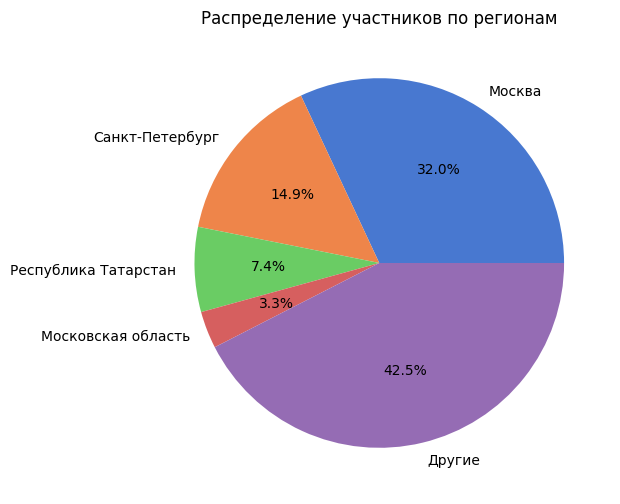

In [278]:
plt.figure(figsize=(6, 6))
plt.pie(subjects_distribution_top_4['count'], labels=subjects_distribution_top_4['Субъект РФ'], autopct='%1.1f%%', colors=colors_base)

plt.title("Распределение участников по регионам")
plt.show()

Более половины всех участников из четырёх регионов: Москва, Санкт-Петербург, Татарстан и Московская область. Только из Москвы почти треть всех участников

### Класс участия

In [279]:
grade_distribution = df['Класс участия'].value_counts().reset_index()
grade_distribution

,Класс участия,count
0,9,1386
1,11,1377
2,10,1360


Участников по разным классам почти одинаковое количество. Это связано со спецификой олимпиады. В заключительный этап проходит фиксированное количество человек, причём организаторы стараются сделать количество человек в каждом классе одинаковым

### Класс обучения

In [280]:
grade_study_distribution = df['Класс обучения'].value_counts().reset_index()
grade_study_distribution

,Класс обучения,count
0,10,1398
1,11,1319
2,9,1167
3,8,202
4,7,31
5,6,4
6,5,2


Количество учеников из 10 и 11 класса примерно одинаково. Учеников из 9 класса немного меньше, так как в олимпиаде 9 класса иногда участвуют ученики из более младших классов, а общее количество мест ограничено. Из млаших классов больше всего участников из 8, но также есть очень малое количество участников из 5-7.

In [281]:
grade_study_grouped = grade_study_distribution[:3]
other_grades_count = grade_study_distribution[3:]['count'].sum()
grade_study_grouped = (pd.concat([grade_study_grouped, pd.DataFrame({'Класс обучения': ['Младше 9'], 'count': other_grades_count})])
                              .reset_index(drop=True)
)
grade_study_grouped = grade_study_grouped.replace({9: '9 класс', 10: '10 класс', 11: '11 класс'})

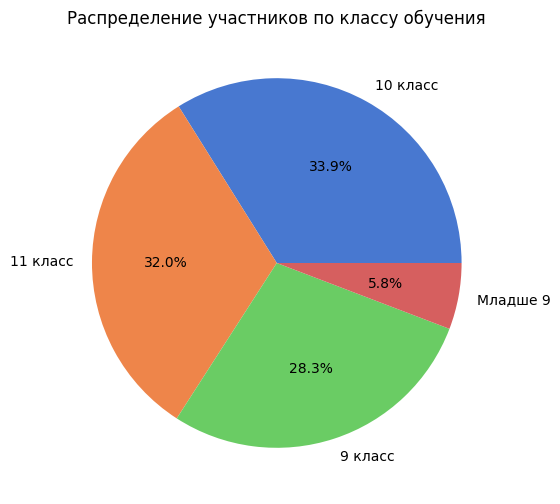

In [282]:
plt.figure(figsize=(6, 6))
plt.pie(grade_study_grouped['count'], labels=grade_study_grouped['Класс обучения'], autopct='%1.1f%%', colors=colors_base)

plt.title("Распределение участников по классу обучения")
plt.show()

Почти 6 % участников учатся в классе меньше 9

### Образовательное учреждение

In [283]:
schools_distribution = df.loc[df['Образовательное учреждение'] != '', 'Образовательное учреждение'].value_counts().reset_index()
with pd.option_context('display.max_colwidth', None):
  display(schools_distribution.head(10))

,Образовательное учреждение,count
0,"Государственное бюджетное общеобразовательное учреждение ""Президентский физико-математический лицей № 239""",420
1,"Государственное бюджетное общеобразовательное учреждение города Москвы ""Лицей ""Вторая школа""",248
2,"Государственное бюджетное общеобразовательное учреждение города Москвы ""Школа № 179""",152
3,"Государственное бюджетное общеобразовательное учреждение города Москвы ""Пятьдесят седьмая школа",143
4,"Муниципальное автономное общеобразовательное учреждение ""Лицей №131"" Вахитовского района г. Казани",88
5,"Кировское областное государственное общеобразовательное автономное учреждение ""Кировский физико-математический лицей""",75
6,"Муниципальное бюджетное общеобразовательное учреждение ""Гимназия № 26"", Республика Татарстан, г. Набережные Челны",70
7,"Государственное бюджетное общеобразовательное учреждение города Москвы ""Школа № 2007 ФМШ""",67
8,"Муниципальное бюджетное общеобразовательное учреждение ""Физико-математический лицей № 31 г. Челябинска""",62
9,Муниципальное бюджетное общеобразовательное учреждение экономико-математический лицей №29,61


Из топ 10 школ по количеству участников: 1 из Санкт-Петербурга (она же и является самой большой по количеству участников), 4 из Москвы, 2 из республики Татарстан, 1 из Кировской области, 1 из Челябинской области и 1 из Удмуртской Республики

### Баллы

In [284]:
score_distribution = df['Баллы']

In [285]:
score_distribution.describe()

,Баллы
count,4123.000000
mean,26.711860
std,10.398602
min,0.000000
25%,20.000000
50%,28.000000
75%,34.000000
max,56.000000


Среднее значение баллов - 26.7, а медианное - 28. Это половина из максимально возможных баллов - 56. Стандартное отклонение - 10.4

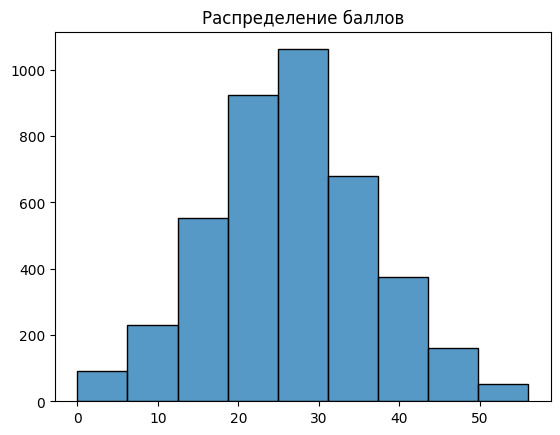

In [286]:
sns.histplot(score_distribution, bins=9, kde=False)
plt.title('Распределение баллов')
plt.ylabel('')
plt.xlabel('')
plt.show()

Из гистограммы видно, что чаще всего ученики получают чуть меньше 30 баллов. Видно, что справа от наиболее частого значения частота немного меньше чем слева. Найдём коэффициенты ассиметрии и эксцесса. И проверим, можно ли считать распределение баллов нормальным.

In [287]:
print(f"Коэффициент асимметрии: {stats.skew(score_distribution)}")
print(f"Коэффициент эксцесса: {stats.kurtosis(score_distribution)}")

Коэффициент асимметрии: 0.05699376026749862
Коэффициент эксцесса: -0.1690839539831548


Коэффициент асимметрии близок к нулю, коэффициент эксцесса имеет некоторое отклонение. Проверим гипотезу о нормальности с помощью критерия Д’Агостино. Далее будем при проверке гипотез использовать уровень значимости 0.05

In [288]:
stats.normaltest(score_distribution)

NormaltestResult(statistic=7.862853693267324, pvalue=0.019615664031694263)

p-value меньше уровня значимости. Поэтому отвергаем гипотезу о нормальности. Распределение баллов не является нормальным

### Статус

In [289]:
status_distribution = df['Статус'].value_counts().reset_index()
status_distribution

,Статус,count
0,участник,1886
1,призер,1450
2,похвальная грамота,563
3,победитель,224


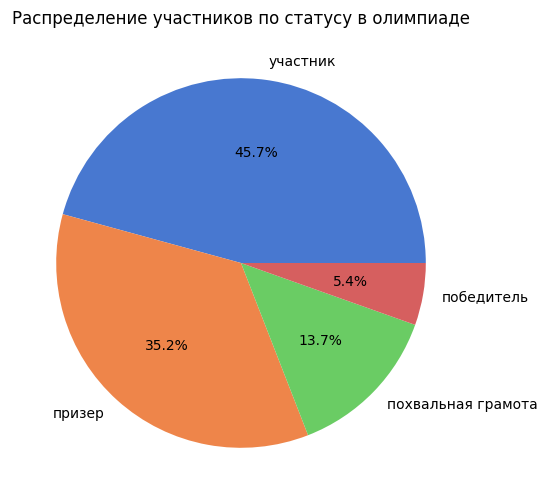

In [290]:
plt.figure(figsize=(6, 6))
plt.pie(status_distribution['count'], labels=status_distribution['Статус'], autopct='%1.1f%%', colors=colors_base)

plt.title("Распределение участников по статусу в олимпиаде")
plt.show()

Формально похвальная грамота не является призовым местом и не дает льгот для поступления. Она служит поощрением участника, который хорошо написал олимпиаду, но немного не набрал баллов до статуса призера. Объединим статус участника и похвальной грамоты

In [291]:
status_distribution_grouped = status_distribution.loc[[0,1,3]].reset_index(drop=True)
status_distribution_grouped.loc[0, 'count'] += status_distribution.loc[2, 'count']

In [292]:
status_distribution_grouped

,Статус,count
0,участник,2449
1,призер,1450
2,победитель,224


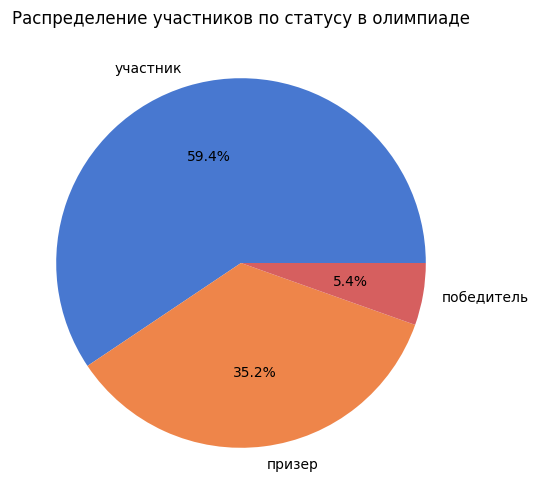

In [293]:
plt.figure(figsize=(6, 6))
plt.pie(status_distribution_grouped['count'], labels=status_distribution_grouped['Статус'], autopct='%1.1f%%', colors=[colors_base[0], colors_base[1], colors_base[3]])

plt.title("Распределение участников по статусу в олимпиаде")
plt.show()

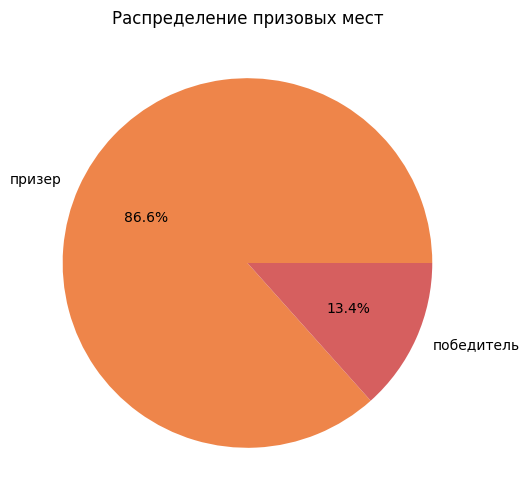

In [294]:
plt.figure(figsize=(6, 6))
plt.pie(status_distribution_grouped.loc[[1,2],'count'], labels=status_distribution_grouped.loc[[1,2],'Статус'], autopct='%1.1f%%', colors=[colors_base[1], colors_base[3]])

plt.title("Распределение призовых мест")
plt.show()

Около 40% всех участников получают призовые места. Из них практически 87 % являются призерами и 13% - победителями

### Год олимпиады

In [295]:
year_distribution = df['Год олимпиады'].value_counts().reset_index().sort_values(by='Год олимпиады')
year_distribution

,Год олимпиады,count
9,2014,339
8,2015,355
4,2016,387
7,2017,364
6,2018,378
5,2019,378
0,2021,516
3,2022,455
1,2023,480
2,2024,471


In [296]:
print(f"Среднее за период 2014-2019: {int(year_distribution[year_distribution['Год олимпиады'] <= 2019]['count'].mean().round())}")
print(f"Среднее за период 2021-2024: {int(year_distribution[year_distribution['Год олимпиады'] >= 2021]['count'].mean().round())}")

Среднее за период 2014-2019: 367
Среднее за период 2021-2024: 480


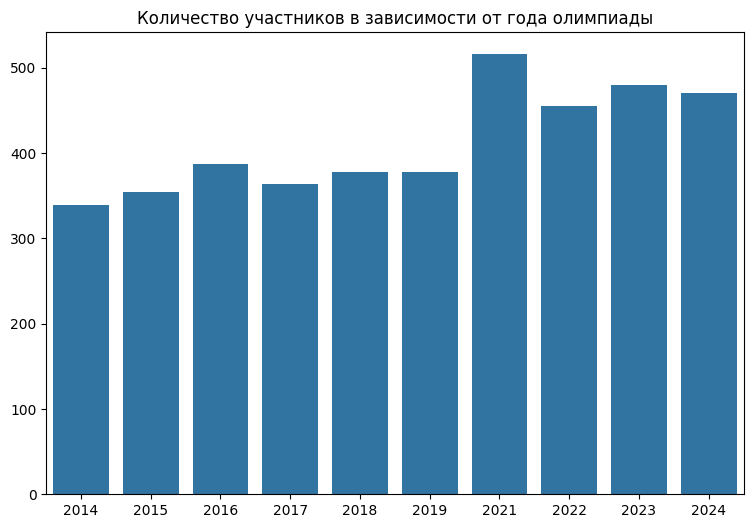

In [297]:
plt.figure(figsize=(9, 6))
sns.barplot(x=year_distribution['Год олимпиады'].astype(str), y=year_distribution['count'])

plt.title("Количество участников в зависимости от года олимпиады")
plt.ylabel('')
plt.xlabel('')
plt.show()

Количество участников до 2021 года практически не меняется и остаётся около 350. Но в 2021 году количество участников резко увеличилось до 500. Далее количество участников немного уменьшилось, но не вернулось к прежним цифрам. Это связано с эпидемией COVID-19 в 2020 году. В этом году олимпиада не проводилась и призёрами были признаны только ученики 11 класса, которые набрали достаточное количество баллов на региональном этапе, чтобы пройти в следующий. В 2021 году участниками заключительного этапа помимо учеников, которые набрали необходимое количество баллов в региональном этапе для участия в заключительном этапе олимпиады были призёры заключительного этапа 2019 года, а также ученики, которые в региональном этапе 2020 года набрали достаточное количество баллов для участия в заключительном этапе олимпиады. Из-за 2020 года, изменения повлияли на следующие, и количество участников стало больше

## Анализ взаимосвязи данных

Далее рассмотрим, как данные из колонок **Субъект РФ**, **Класс участия**, **Класс обучения**, **Образовательное учреждение**, **Баллы**, **Статус**, **Год олимпиады** связаны друг с другом

Исследуем следующие вопросы:  

1.   Как менялась доля призеров/победителей среди всех учеников в разные годы
2.   Нахождение регионов, с самым большим средним количеством баллов.
3.   Какая есть динамика по среднему баллу у регионов с течением времени.
4.   В топ 5 регионах по количеству участников исследовать их распределение по школам
5.   Нахождение регионов с самым большим оттоком/притоком учеников в другие регионы
6.   Влияет ли переезд в более крупный регион на результат выступления на олимпиаде




### Доля призеров/победителей

Рассмотрим как менялось количество учеников, которые получали статус призёра/победителя в разные годы. На данный момент в правилах олимпиады указаны следующие условия: число победителей и призеров не должно превышать 45% от общего числа участников, а число победителей не должно превышать 8% от общего числа участников. При этом число баллов, которые необходимо получить для призового места должно быть не менее 50% от максимального. В рамках этих правил организаторы устанавливают балл, который необходимо набрать для призовых мест. В 2014 году было ограничение в 30% призовых мест.  Посмотрим как менялись пороговые баллы и число призовых мест в разные годы

Далее объединим категории участник и похвальная грамота, так как они не отличаются с точки зрения определения призового места

In [298]:
df_participant_unified = df.copy()
df_participant_unified['Статус'] = df['Статус'].replace({'похвальная грамота': 'участник'})

In [299]:
df_participant_unified_counts = df_participant_unified.groupby(['Год олимпиады', 'Класс участия'])['Статус'].value_counts()

In [300]:
df_participant_unified_counts.head(9)

Год олимпиады  Класс участия  Статус    
2014           9              участник      90
                              призер        21
                              победитель    10
               10             участник      73
                              призер        28
                              победитель     6
               11             участник      77
                              призер        31
                              победитель     3
Name: count, dtype: int64

In [301]:
df_total_participant_count = df_participant_unified_counts.groupby('Год олимпиады').sum()

In [302]:
df_participant_unified_counts_final = pd.concat([pd.DataFrame(df_participant_unified_counts),
           pd.DataFrame({'count_percent': df_participant_unified_counts / df_total_participant_count * 100})], axis = 1)['count_percent']
df_participant_unified_counts_final = df_participant_unified_counts_final.loc[df_participant_unified_counts_final
                                        .index.get_level_values('Статус').isin(['призер', 'победитель'])].unstack().reset_index()

In [303]:
df_total_prizes = (df_participant_unified_counts_final.groupby('Год олимпиады')['призер'].sum() +
df_participant_unified_counts_final.groupby('Год олимпиады')['победитель'].sum()).round().astype(int)

In [304]:
def add_total_boxes(years, positions, ax, df_total):
  for i, (year, pos) in enumerate(zip(years, [pos + 1 for pos in positions[::3]])):
      ax.text(pos, 3, f'{df_total[year]}%', ha='center', va='bottom', fontsize=12, color='black',
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))

In [305]:
def draw_year_grade_grouped(data_f, title, df_total, mode, year_pos=-3,):
  grouped = data_f
  grouped['Год и класс'] = grouped['Год олимпиады'].astype(str) + ', ' + grouped['Класс участия'].astype(str)
  grouped.set_index('Год и класс', inplace=True)
  grouped = grouped.drop(columns=['Год олимпиады', 'Класс участия'])

  years = list(range(2014, 2020)) + list(range(2021, 2025))
  classes = [9, 10, 11]

  group_spacing = 1.3

  positions = []
  for i, year in enumerate(years):
      start = i * (3 + group_spacing)
      positions.extend([start + j for j in range(3)])

  fig, ax = plt.subplots(figsize=(12, 5))

  bottom = np.zeros(len(positions))
  for status, color in zip(['призер', 'победитель'], ['skyblue', 'orange']):
      ax.bar(positions, grouped[status], bottom=bottom, width=0.8, label=status, color=color)
      bottom += grouped[status]

  ax.set_xticks([])

  for pos, label in zip(positions, [label.split(', ')[1] for label in grouped.index]):
      ax.text(pos, -1, label, ha='center', va='top', fontsize=10, color='black')

  for i, (year, pos) in enumerate(zip(years, [pos + 1 for pos in positions[::3]])):
      ax.text(pos, year_pos, str(year), ha='center', va='top', fontsize=12, color='black')

  if mode == 1:
    add_total_boxes(years, positions, ax, df_total)

  plt.xlabel('')
  plt.ylabel('')
  plt.title(title)
  plt.legend(title='Статус')
  plt.tight_layout()
  plt.show()

In [306]:
print(f"Средний процент призовых мест от всех участников за период 2015-2024 год: {round((df_participant_unified_counts_final.iloc[3:]['призер'] + df_participant_unified_counts_final.iloc[3:]['победитель']).mean() * 3)}%")

Средний процент призовых мест от всех участников за период 2015-2024 год: 41%


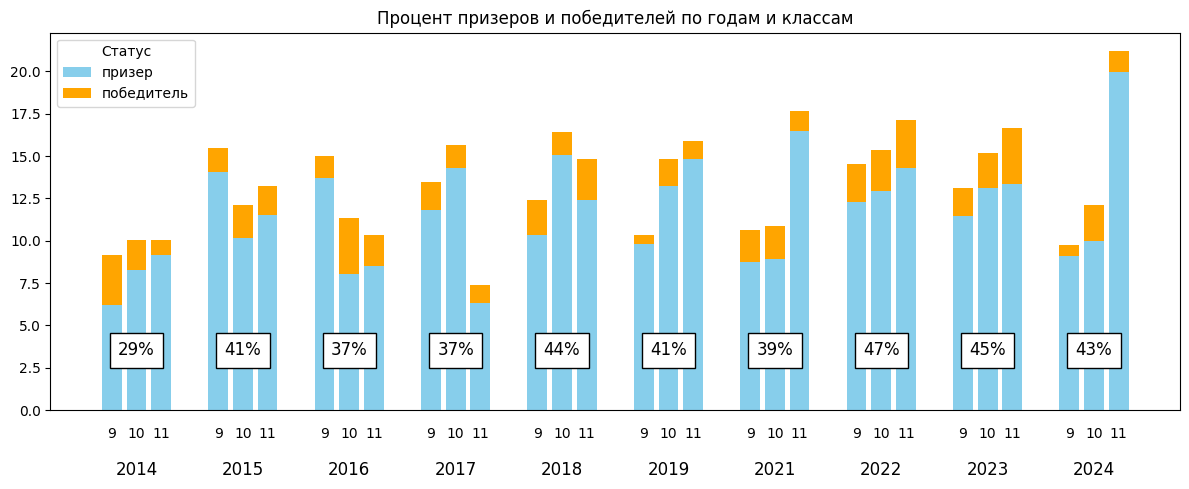

In [307]:
draw_year_grade_grouped(df_participant_unified_counts_final, 'Процент призеров и победителей по годам и классам', df_total_prizes, 1)

В 2014 году процент призовых мест был 29%, так как в этом году по правилам число призовых мест не должно было превышать 30%. А далее процент призовых мест не превышает 45, кроме 2022 года. Там процент призовых мест составляет 47 и скорее всего связано с особым решением организаторов. Из графика видно, что в некоторых годах распределение призовых мест неравномерное. В 2017 году 11 классу дали в 2 раза меньше дипломов, чем 9 и 10. В 2021 году наоборот, им дали почти в 2 раза больше дипломов, чем в 9 и 10. Похожая ситуация повторилась в 2024 году, но там разница ещё больше. Скорее всего такие перекосы в распределении связаны со сложностью задач в отдельном классе. Если задачи очень сложные, то многие ученики не набирают половину баллов от максимального, что является необходимым для получения призового места. Проверим это предположение сравнив среднее количество баллов в разных классах в 2017 и 2024 годах,когда распределения отличались в разные стороны

In [308]:
df[df['Год олимпиады'] == 2017].groupby('Класс участия')['Баллы'].median()

,Баллы
Класс участия,
9,28.0
10,27.5
11,16.0


In [309]:
df[df['Год олимпиады'] == 2024].groupby('Класс участия')['Баллы'].median()

,Баллы
Класс участия,
9,22.0
10,22.0
11,28.0


В 2017 году 11 класс написал олимпиаду гораздо хуже, чем 9 и 10 класс. Более половины учеников не набрали половины от максимума баллов. Поэтому в этом году в 11 классе мало призеров. В 2024 году, наоборот 11 класс написал олимпиаду хорошо, но плохо выступили 9 и 10 класс. Скорее всего такая разница в распределениях связана с неравномерной сложностью задач в разных классах.

Также найдём границы баллов для определения призеров и победителей в каждом классе в разные года

In [310]:
 df_status_scores = (
     (df_participant_unified[df_participant_unified['Статус'].isin(['призер', 'победитель'])]
      .groupby(['Год олимпиады', 'Класс участия', 'Статус'])['Баллы'].min()).unstack()
                      )

In [311]:
df_status_scores['победитель'] = df_status_scores['победитель'] - df_status_scores['призер']
df_status_scores = df_status_scores.reset_index()

In [312]:
df_status_scores

Статус,Год олимпиады,Класс участия,победитель,призер
0,2014,9,9,37
1,2014,10,12,34
2,2014,11,15,37
3,2015,9,15,31
4,2015,10,14,32
5,2015,11,19,28
6,2016,9,19,28
7,2016,10,8,32
8,2016,11,13,28
9,2017,9,15,32


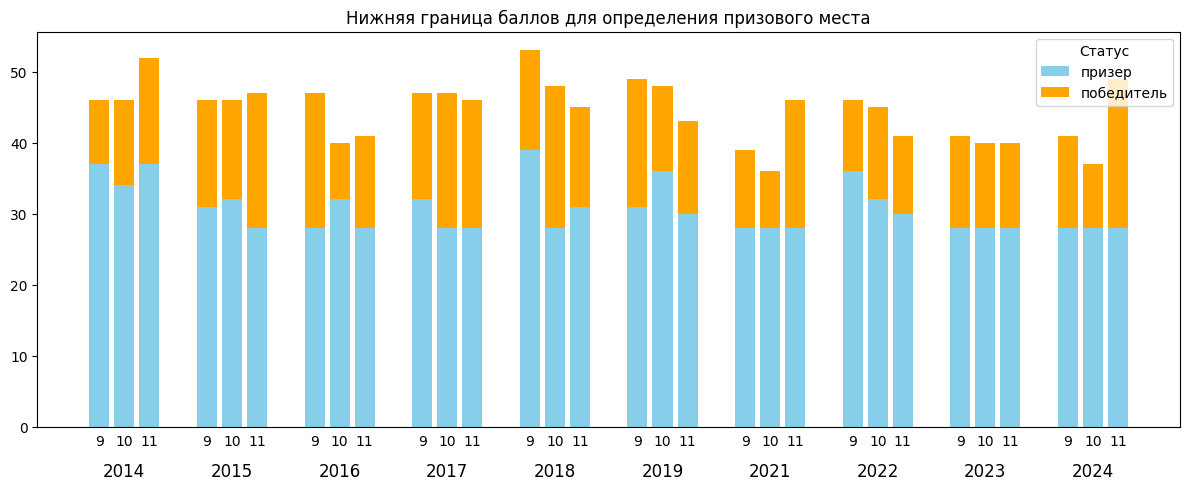

In [313]:
draw_year_grade_grouped(df_status_scores, 'Нижняя граница баллов для определения призового места', _, 0, year_pos=-5)

Количество баллов для статуса призера меняется не сильно и в основном лежит около значения 28, которое является минимальным. Но в отдельных случах повышается. Например в 2018 году в 9 классе сильно повысилась граница определения призеров и победителей. Скорее всего это было сделано, потому что в этом классе было много высоких результатов. Также в 2024 году в 11 классе высокая граница определения победителя. Как мы видели ранее, в этом году 11 класс хорошо написал олимпиаду, и поэтому пришлось повысить граничный балл.

### Регионы с самыми успешными выступлениями. Динамика выступлений регионов

Найдем регионы, в которых ученики имеют самые высокие средние баллы/больше всего процент призовых мест. Будем рассматривать только топ 10 регионов по количеству участников за всё время, так как при малом количестве участников выбросы могут сильно повлиять на результат

Сначала рассмотрим статистику за всё время

In [314]:
subjects_distribution_top_10 = subjects_distribution[:10]['Субъект РФ']

In [315]:
total_mean_grade_9 = (df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Класс участия'] == 9)]
                      .groupby('Субъект РФ')['Баллы'].mean().round(1).sort_values(ascending=False))
total_mean_grade_10 = (df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Класс участия'] == 10)]
                       .groupby('Субъект РФ')['Баллы'].mean().sort_values().round(1).sort_values(ascending=False))
total_mean_grade_11 = (df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Класс участия'] == 11)]
                       .groupby('Субъект РФ')['Баллы'].mean().sort_values().round(1).sort_values(ascending=False))
total_mean = (df[(df['Субъект РФ'].isin(subjects_distribution_top_10))]
                       .groupby('Субъект РФ')['Баллы'].mean().sort_values().round(1).sort_values(ascending=False))

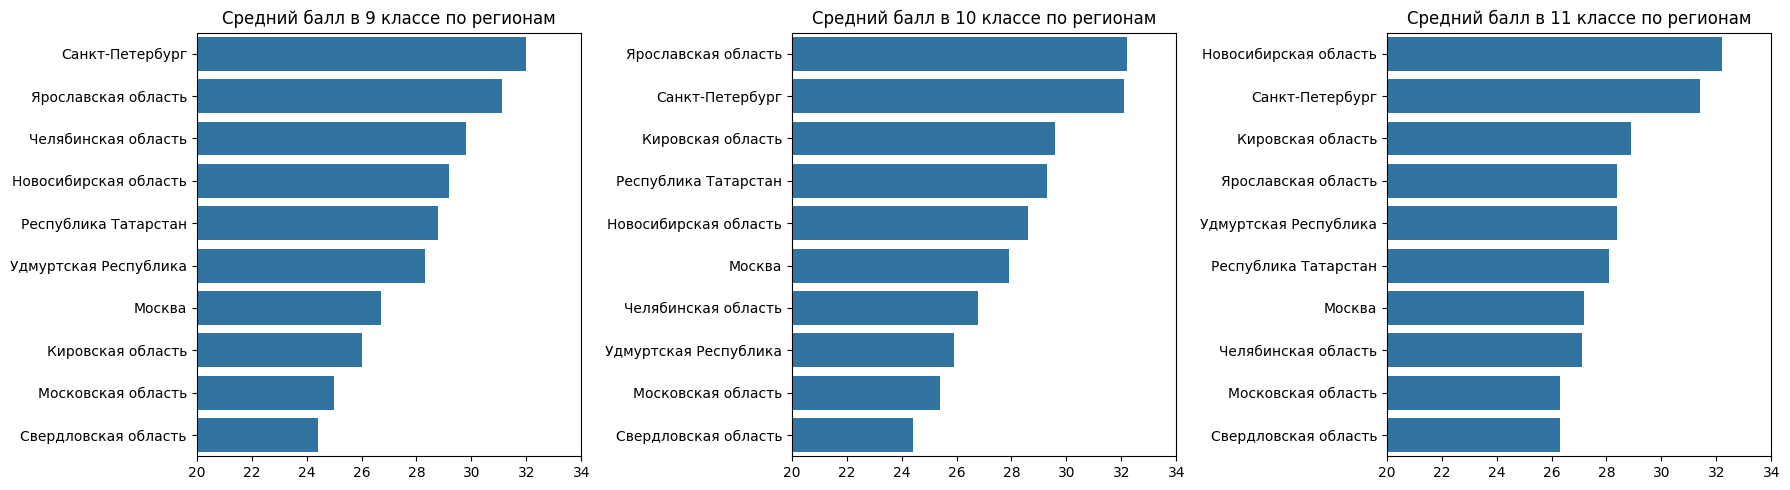

In [316]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=total_mean_grade_9, y=total_mean_grade_9.index, ax=axes[0])

axes[0].set_title('Средний балл в 9 классе по регионам')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_xlim(20,34)

sns.barplot(x=total_mean_grade_10, y=total_mean_grade_10.index, ax=axes[1])

axes[1].set_title('Средний балл в 10 классе по регионам')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xlim(20,34)

sns.barplot(x=total_mean_grade_11, y=total_mean_grade_11.index, ax=axes[2])

axes[2].set_title('Средний балл в 11 классе по регионам')
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_xlim(20,34)

plt.tight_layout()
plt.show()

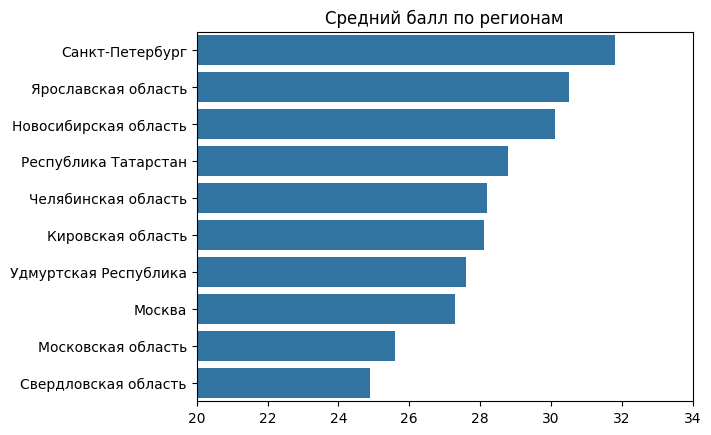

In [317]:
sns.barplot(x=total_mean, y=total_mean.index)

plt.title('Средний балл по регионам')
plt.xlabel('')
plt.ylabel('')
plt.xlim(20,34)

plt.show()

Видно сильное отличие в распределении баллов по разным классам для некоторых регионов, например: Новосибирская область, Кировская область. В общем зачёте лидер: Санкт-Петербург. Следует отметить, что Москва находится лишь на 8 месте в общем зачёте. Данный способ нахождения региона с самыми успешными выступлениями не очень точен, так как в разные годы сложность заданий разная, и ученики пишут олимпиаду на разные баллы. Поэтому чтобы сравнить регионы за весь промежуток, лучше посчитать процент призовых мест от всех участников из данного региона

In [318]:
df_subject_total_count_9 = df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Класс участия'] == 9)].groupby('Субъект РФ')['Статус'].count()
df_subject_total_count_10 = df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Класс участия'] == 10)].groupby('Субъект РФ')['Статус'].count()
df_subject_total_count_11 = df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Класс участия'] == 11)].groupby('Субъект РФ')['Статус'].count()
df_subject_total_count =  df[(df['Субъект РФ'].isin(subjects_distribution_top_10))].groupby('Субъект РФ')['Статус'].count()

In [319]:
df_prize_total_percent_9 = (
    df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Класс участия'] == 9) &
       (df['Статус'].isin(['призер', 'победитель']))].groupby('Субъект РФ')['Статус'].count() / df_subject_total_count_9 * 100
    ).sort_values(ascending=False)
df_prize_total_percent_10 = (
    df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Класс участия'] == 10) &
       (df['Статус'].isin(['призер', 'победитель']))].groupby('Субъект РФ')['Статус'].count() / df_subject_total_count_10 * 100
    ).sort_values(ascending=False)
df_prize_total_percent_11 = (
    df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Класс участия'] == 11) &
       (df['Статус'].isin(['призер', 'победитель']))].groupby('Субъект РФ')['Статус'].count() / df_subject_total_count_11 * 100
    ).sort_values(ascending=False)
df_prize_total_percent = (
    df[(df['Субъект РФ'].isin(subjects_distribution_top_10))  &
       (df['Статус'].isin(['призер', 'победитель']))].groupby('Субъект РФ')['Статус'].count() / df_subject_total_count * 100
    ).sort_values(ascending=False)

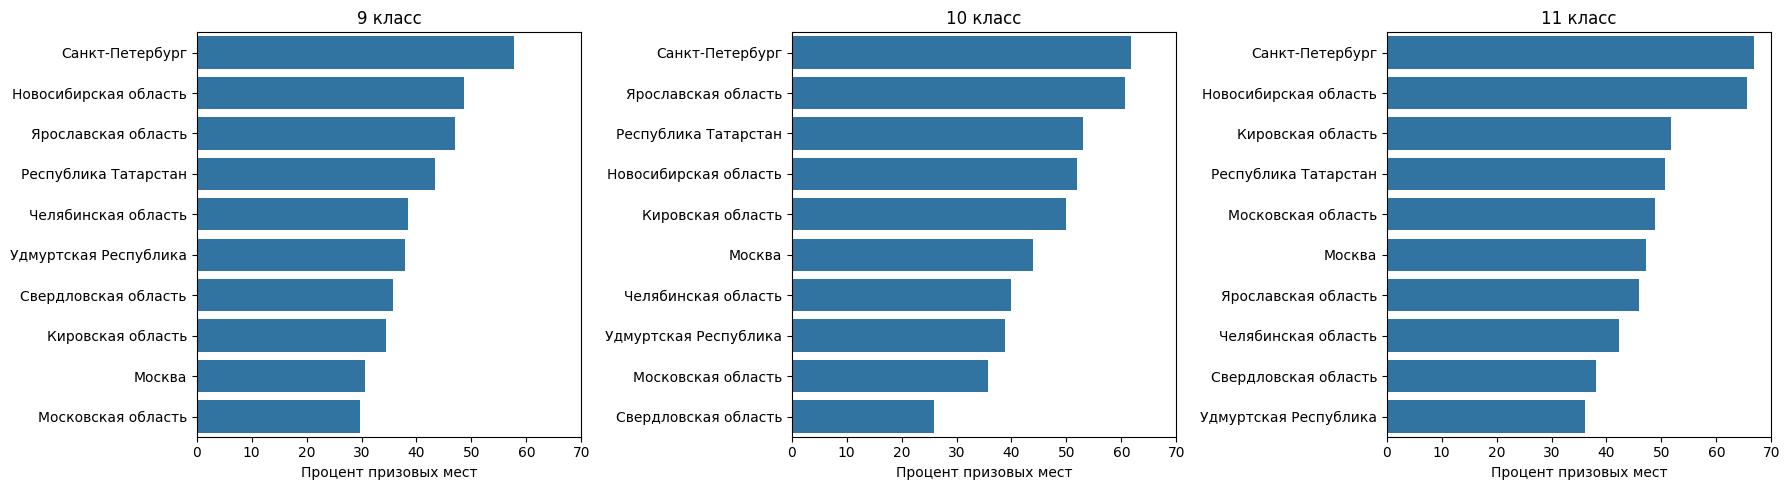

In [320]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=df_prize_total_percent_9, y=df_prize_total_percent_9.index, ax=axes[0])

axes[0].set_title('9 класс')
axes[0].set_xlabel('Процент призовых мест')
axes[0].set_ylabel('')
axes[0].set_xlim(0,70)

sns.barplot(x=df_prize_total_percent_10, y=df_prize_total_percent_10.index, ax=axes[1])

axes[1].set_title('10 класс')
axes[1].set_xlabel('Процент призовых мест')
axes[1].set_ylabel('')
axes[1].set_xlim(0,70)

sns.barplot(x=df_prize_total_percent_11, y=df_prize_total_percent_11.index, ax=axes[2])
axes[2].set_title('11 класс')
axes[2].set_xlabel('Процент призовых мест')
axes[2].set_ylabel('')
axes[2].set_xlim(0,70)

plt.tight_layout()
plt.show()

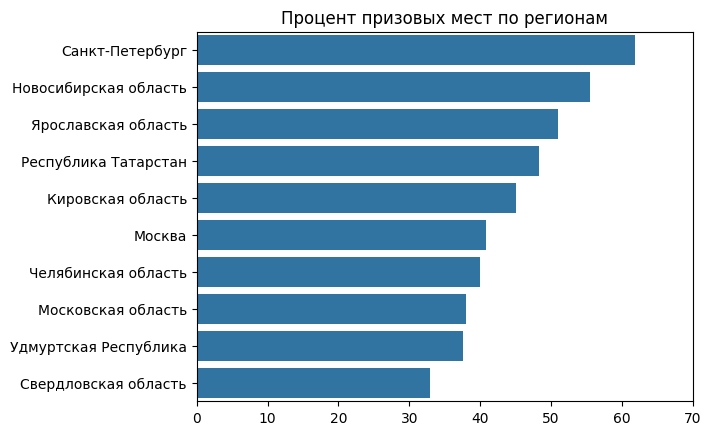

In [321]:
sns.barplot(x=df_prize_total_percent, y=df_prize_total_percent.index)

plt.title('Процент призовых мест по регионам')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,70)

plt.show()

В общем зачёте распределение регионов мало поменялось. Лидер: Санкт-Петербург с 62 % призовых мест от всех участников. Далее идут: Новосибирская область, Ярославская область, Республика Татарстан и Кировская область. Москва находится на 6 месте. Есть регионы, которые хорошо себя показывают в более младших классах, но хуже в других. В целом распределение отдельно по классам по сравнению с анализом по среднему баллу не сильно различается. Но в 9 классе Свердловская область по баллам имела 10 место, а по процентам 7. Также в 11 классе Московская область по баллам имела 9 место, а по призовым местам - 5, Удмуртская Республика по баллам - 5, а по процентам - 10. Средний балл показывает то, насколько хорошо выступают в целом ученики, а количество призёров показывает насколько много сильных учеников из всех участников в регионе. Видно что в 9м классе в Свердловской области больше перекос сильных учеников, в среднем ученики там выступают не так успешно. В 11 классе такая же ситуация наблюдается в Московской области. А в Удмуртской Республике - наоборот, по баллам она занимает довольно высокие позиции, что означает, что общий уровень подготовки довольно высокий, но призовых мест не очень много, что означает небольшое количество сильных учеников.

In [322]:
subjects_distribution_top_10 = subjects_distribution[:10]['Субъект РФ']

Проанализируем выступления регионов по годам. Так же возьмём топ 10 регионов по количеству участников, и будем анализировать процент призовых мест в регионе среди всех участников от региона. Не будем брать в расчёт 2014 год, так как в этом году максимально допустимая доля призеров была меньше чем в последующих.

In [323]:
df_subject_year_count =  df[(df['Субъект РФ'].isin(subjects_distribution_top_10)) & (df['Год олимпиады'] != 2014)].groupby(['Субъект РФ', 'Год олимпиады'])['Статус'].count()

In [324]:
df_prize_year_percent = (
    df[(df['Субъект РФ'].isin(subjects_distribution_top_10))  &
       (df['Статус'].isin(['призер', 'победитель'])) & (df['Год олимпиады'] != 2014)].groupby(['Субъект РФ', 'Год олимпиады'])['Статус'].count() / df_subject_year_count * 100
    ).round(2)

In [325]:
prize_year_percent_dict = {name: df_prize_year_percent.xs(name, level=0).fillna(0) for name in subjects_distribution_top_10}

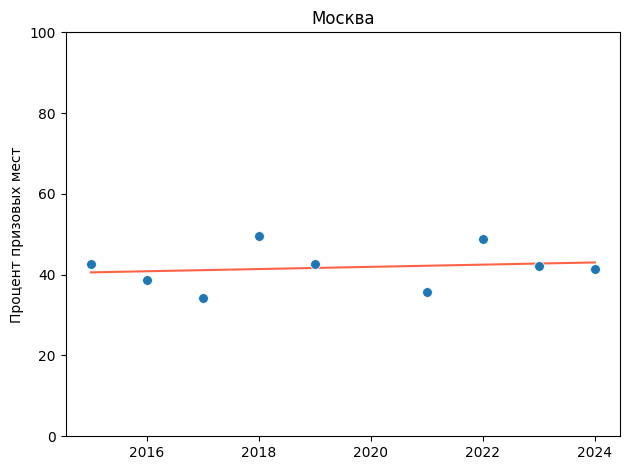

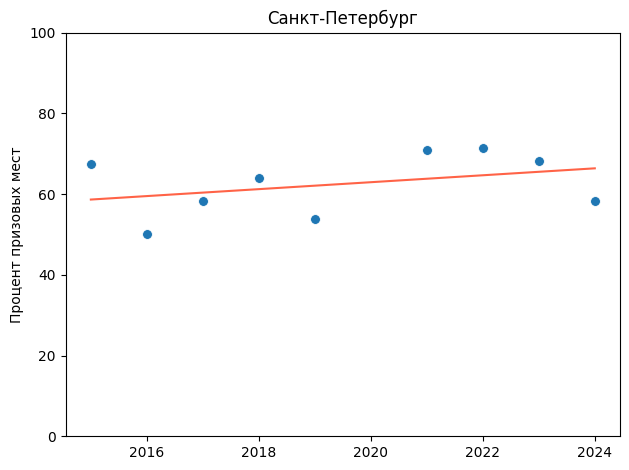

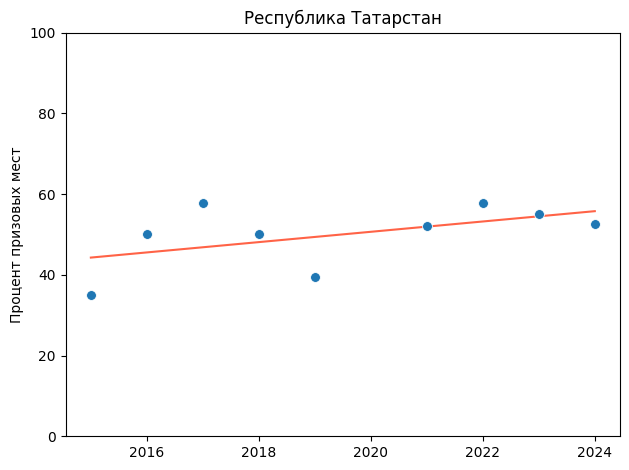

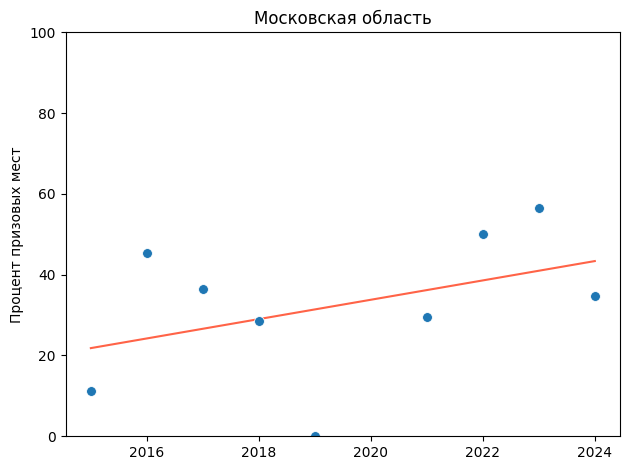

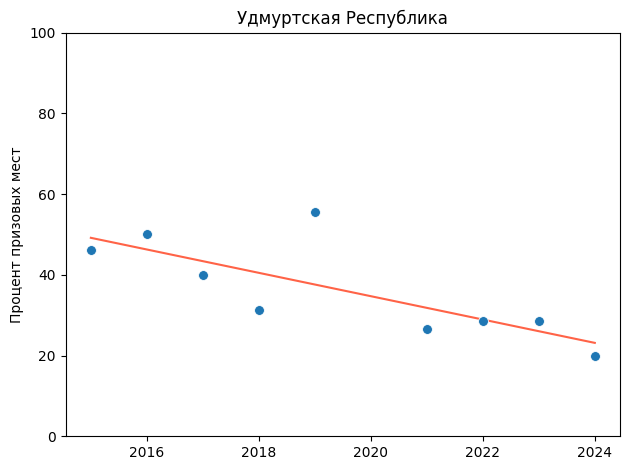

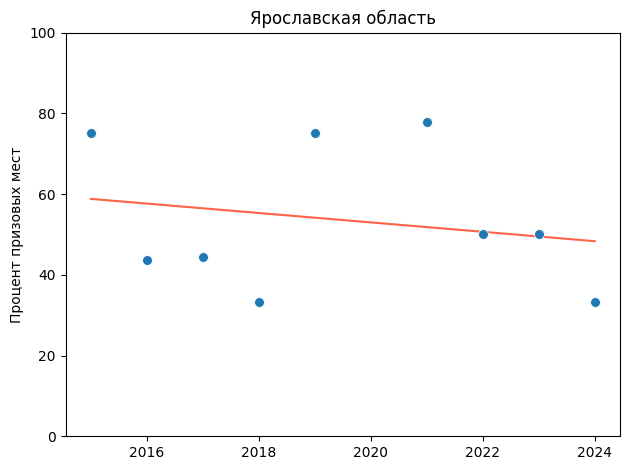

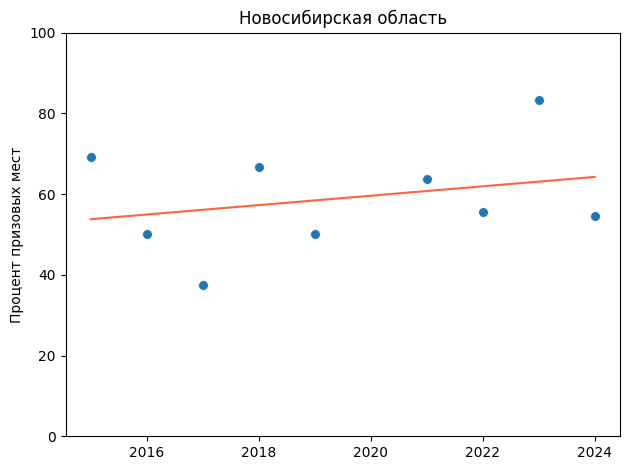

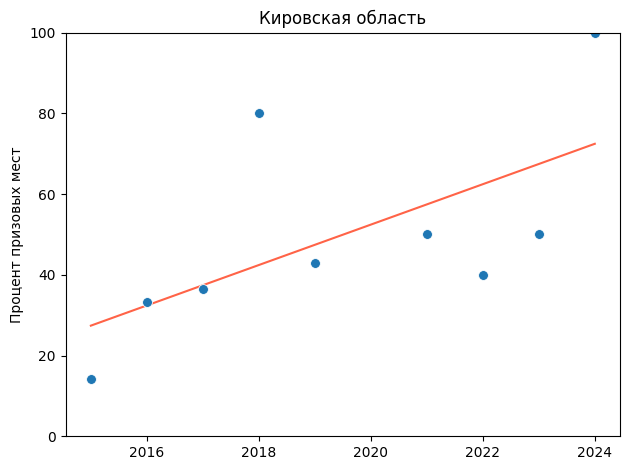

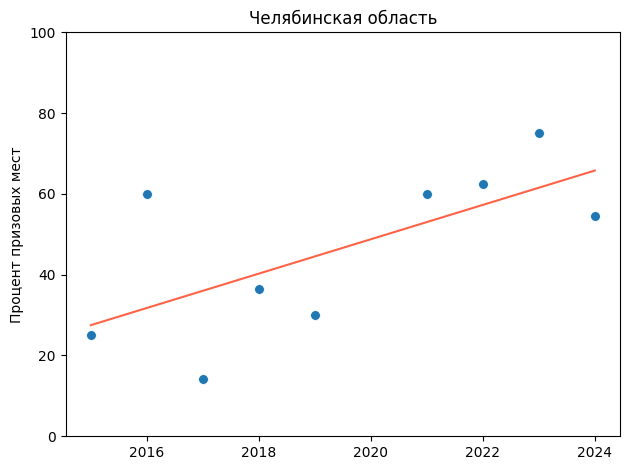

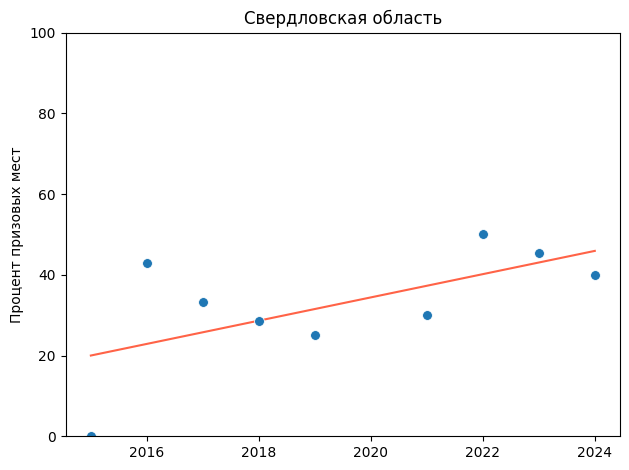

In [326]:
for region in prize_year_percent_dict:
  coefficients = np.polyfit(prize_year_percent_dict[region].index, prize_year_percent_dict[region], deg=1)
  trend_line = np.poly1d(coefficients)

  plt.plot(prize_year_percent_dict[region].index, trend_line(prize_year_percent_dict[region].index), color='tomato', zorder=1)
  sns.scatterplot(x=prize_year_percent_dict[region].index, y=prize_year_percent_dict[region], s=50, zorder=2)

  plt.title(region)
  plt.xlabel('')
  plt.ylabel('Процент призовых мест')
  plt.ylim(0, 100)
  plt.tight_layout()
  plt.show()

In [327]:
stat_data_regions_percent = pd.DataFrame(index = subjects_distribution_top_10, columns=['r2', 'f_pvalue', 'coef'])
for region in prize_year_percent_dict:
  print(region)
  print('-'*100)
  data = prize_year_percent_dict[region].reset_index().rename(columns={'Год олимпиады': 'year', 'Статус': 'percent'})
  data['year'] -= 2015
  results1 = smf.ols('percent ~ year', data=data).fit()
  stat_data_regions_percent.loc[region, 'r2'] = results1.rsquared
  stat_data_regions_percent.loc[region, 'f_pvalue'] = results1.f_pvalue
  stat_data_regions_percent.loc[region, 'coef'] = results1.params['year']
  display(results1.summary())
  print('-'*100)

Москва
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                    0.2070
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.663
Time:                        23:59:08   Log-Likelihood:                -26.887
No. Observations:                   9   AIC:                             57.77
Df Residuals:                       7   BIC:                             58.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5786      3.226     12.580      0.000      32.951      48.206
year           0.2731      0.600      0.455      0.663      -1.146       1.692
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   2.817
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.372
Skew:                           0.212   Prob(JB):                        0.830
Kurtosis:                       2.098   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Санкт-Петербург
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.012
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.348
Time:                        23:59:08   Log-Likelihood:                -30.061
No. Observations:                   9   AIC:                             64.12
Df Residuals:                       7   BIC:                             64.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.6386      4.590     12.776      0.000      47.785      69.492
year           0.8591      0.854      1.006      0.348      -1.160       2.878
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                0.986
Skew:                          -0.213   Prob(JB):                        0.611
Kurtosis:                       1.436   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Республика Татарстан
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     2.608
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.150
Time:                        23:59:08   Log-Likelihood:                -29.371
No. Observations:                   9   AIC:                             62.74
Df Residuals:                       7   BIC:                             63.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2641      4.251     10.413      0.000      34.212      54.316
year           1.2773      0.791      1.615      0.150      -0.593       3.148
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.250
Skew:                          -0.150   Prob(JB):                        0.883
Kurtosis:                       2.241   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Московская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.543
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.254
Time:                        23:59:08   Log-Likelihood:                -37.388
No. Observations:                   9   AIC:                             78.78
Df Residuals:                       7   BIC:                             79.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.8259     10.360      2.107      0.073      -2.672      46.324
year           2.3942      1.928      1.242      0.254      -2.164       6.952
==============================================================================
Omnibus:                        0.957   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.505
Skew:                          -0.528   Prob(JB):                        0.777
Kurtosis:                       2.520   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Удмуртская Республика
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     9.916
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0162
Time:                        23:59:08   Log-Likelihood:                -30.714
No. Observations:                   9   AIC:                             65.43
Df Residuals:                       7   BIC:                             65.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.1592      4.936      9.960      0.000      37.489      60.830
year          -2.8916      0.918     -3.149      0.016      -5.063      -0.720
==============================================================================
Omnibus:                        9.268   Durbin-Watson:                   3.024
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.418
Skew:                           1.361   Prob(JB):                        0.181
Kurtosis:                       4.307   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Ярославская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.3229
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.588
Time:                        23:59:08   Log-Likelihood:                -37.940
No. Observations:                   9   AIC:                             79.88
Df Residuals:                       7   BIC:                             80.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.8014     11.016      5.338      0.001      32.753      84.850
year          -1.1646      2.050     -0.568      0.588      -6.011       3.682
==============================================================================
Omnibus:                        1.820   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                0.858
Skew:                           0.314   Prob(JB):                        0.651
Kurtosis:                       1.624   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


----------------------------------------------------------------------------------------------------
Новосибирская область
----------------------------------------------------------------------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.5897
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.468
Time:                        23:59:08   Log-Likelihood:                -35.222
No. Observations:                   9   AIC:                             74.44
Df Residuals:                       7   BIC:                             74.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.7708      8.144      6.602      0.000      34.513      73.029
year           1.1636      1.515      0.768      0.468      -2.419       4.747
==============================================================================
Omnibus:                        0.653   Durbin-Watson:                   2.666
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.573
Skew:                           0.283   Prob(JB):                        0.751
Kurtosis:                       1.901   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Кировская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     4.465
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0725
Time:                        23:59:08   Log-Likelihood:                -39.243
No. Observations:                   9   AIC:                             82.49
Df Residuals:                       7   BIC:                             82.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.4038     12.731      2.152      0.068      -2.701      57.508
year           5.0051      2.369      2.113      0.072      -0.596      10.606
==============================================================================
Omnibus:                        2.461   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                1.273
Skew:                           0.893   Prob(JB):                        0.529
Kurtosis:                       2.546   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


----------------------------------------------------------------------------------------------------
Челябинская область
----------------------------------------------------------------------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     5.521
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0511
Time:                        23:59:08   Log-Likelihood:                -36.821
No. Observations:                   9   AIC:                             77.64
Df Residuals:                       7   BIC:                             78.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.5103      9.728      2.828      0.025       4.508      50.513
year           4.2527      1.810      2.350      0.051      -0.027       8.532
==============================================================================
Omnibus:                        0.501   Durbin-Watson:                   2.660
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.354
Skew:                           0.390   Prob(JB):                        0.838
Kurtosis:                       2.419   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Свердловская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                percent   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     4.380
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0746
Time:                        23:59:08   Log-Likelihood:                -34.354
No. Observations:                   9   AIC:                             72.71
Df Residuals:                       7   BIC:                             73.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0019      7.396      2.705      0.030       2.514      37.490
year           2.8798      1.376      2.093      0.075      -0.374       6.133
==============================================================================
Omnibus:                        0.174   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.917   Jarque-Bera (JB):                0.075
Skew:                           0.042   Prob(JB):                        0.963
Kurtosis:                       2.561   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------


In [328]:
stat_data_regions_percent.sort_values(['r2'], ascending=False)

,r2,f_pvalue,coef
Субъект РФ,,,
Удмуртская Республика,0.586189,0.016176,-2.891568
Челябинская область,0.440953,0.051107,4.252689
Кировская область,0.389447,0.07246,5.005149
Свердловская область,0.384907,0.074646,2.879824
Республика Татарстан,0.271467,0.150337,1.277338
Московская область,0.18059,0.254209,2.394162
Санкт-Петербург,0.126309,0.347928,0.859054
Новосибирская область,0.077693,0.467657,1.163568
Ярославская область,0.044089,0.587651,-1.164554


В топ 3 регионах: Москва, Санкт-Петербург и Республика Татарстан нет оснований полагать, что средний процент призовых мест изменяется в какую либо сторону, так как p-value F-статистики больше уровня значимости 0.05. В Удмуртской Республике наблюдается статистически значимая отрицательная корелляция c $R^2=0.586$ и процент призовых мест в среднем за год уменьшается на 2.9%. Для Челябинской области p-value 0.0511 с $R^2=0.441$. Нет оснований отклонять гипотезу об равенстве коэффициента детерминации нулю, но так как p-value близок к уровню значимости, можно сказать что возможно всё-таки средний процент изменяется. В целом такой анализ имеет свои недостатки, так как для регионов не из топ 3 по количеству участников, количество участников не очень много в рамках одного года и это может давать сильные погрешности

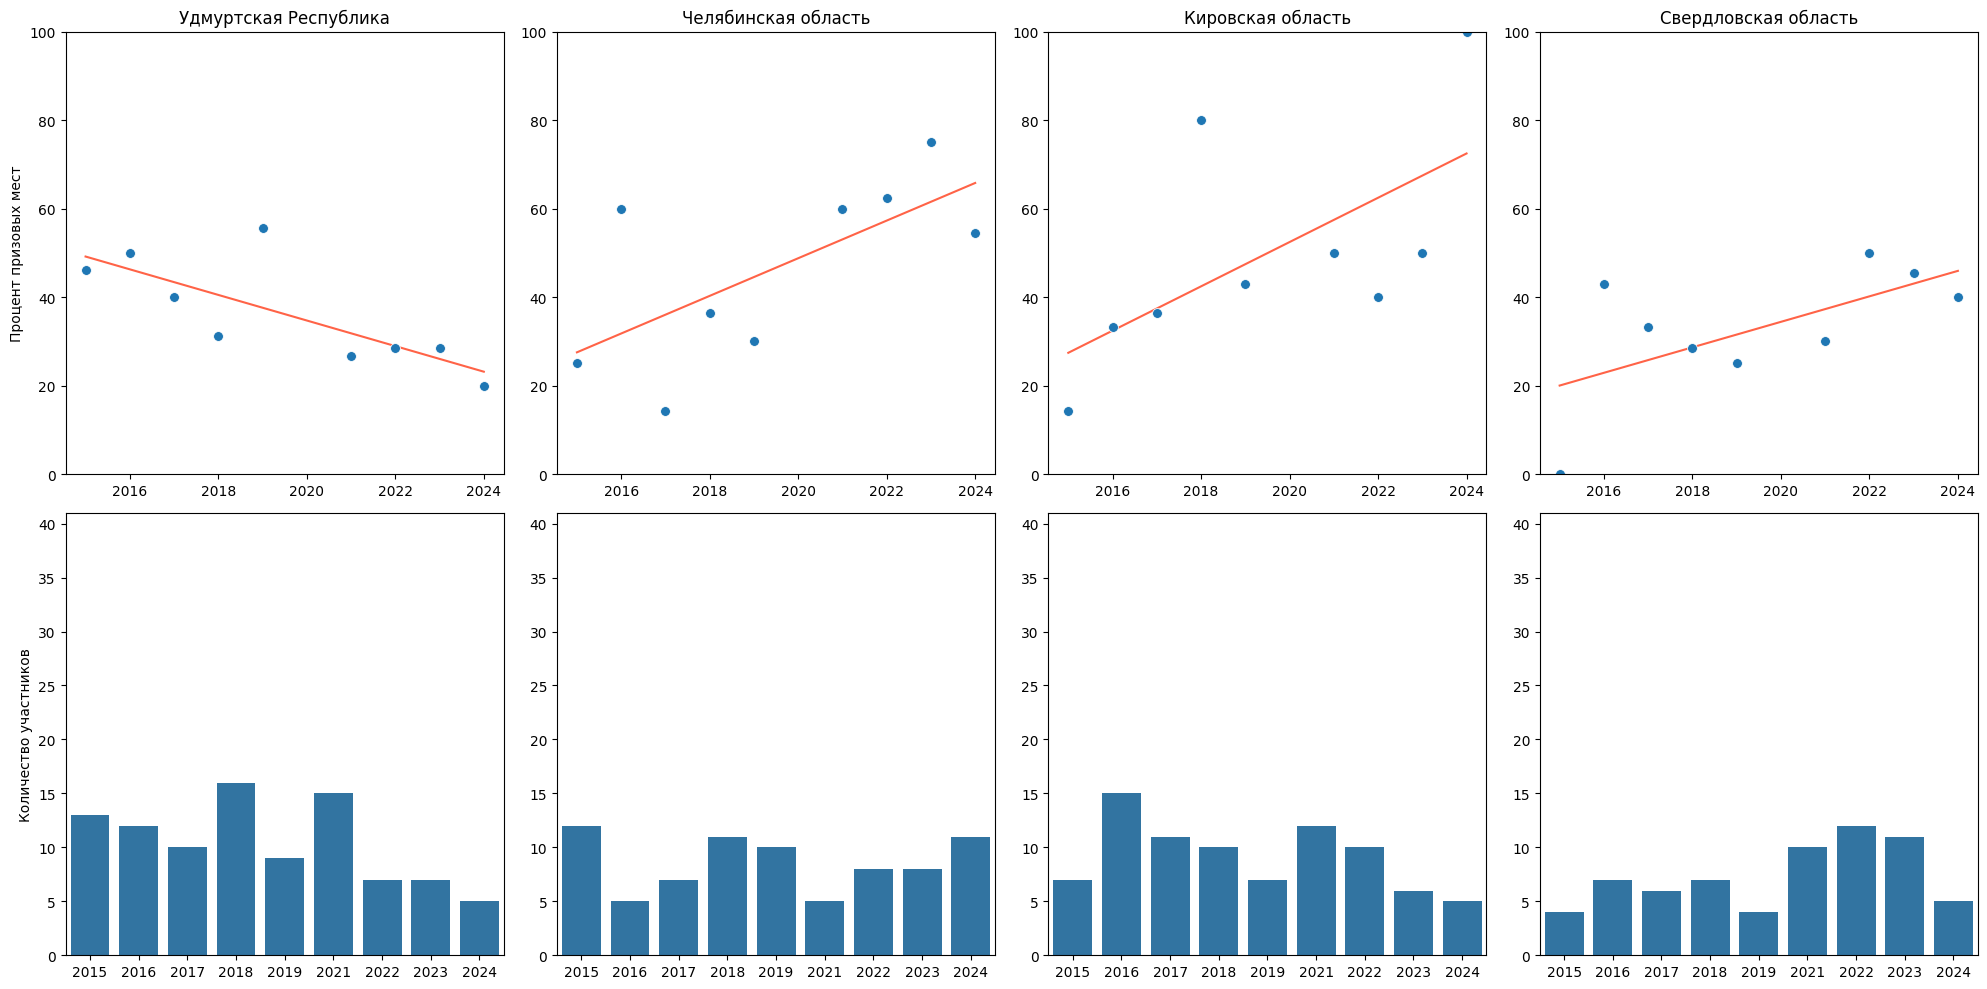

In [329]:
names_reg = ['Удмуртская Республика', 'Челябинская область', 'Кировская область', 'Свердловская область']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for ax, region in zip(axes[0], names_reg):
    coefficients = np.polyfit(prize_year_percent_dict[region].index, prize_year_percent_dict[region], deg=1)
    trend_line = np.poly1d(coefficients)

    ax.plot(prize_year_percent_dict[region].index, trend_line(prize_year_percent_dict[region].index), color='tomato', zorder=1)

    sns.scatterplot(x=prize_year_percent_dict[region].index, y=prize_year_percent_dict[region], s=50, zorder=2, ax=ax)

    ax.set_title(region)
    ax.set_xlabel('')
    if ax == axes[0][0]:
      ax.set_ylabel('Процент призовых мест')
    else:
      ax.set_ylabel('')
    ax.set_ylim(0, 100)

for ax, region in zip(axes[1], names_reg):

    sns.barplot(x=df_subject_year_count[region].index, y=df_subject_year_count[region], ax=ax)

    ax.set_title('')
    ax.set_xlabel('')
    if ax == axes[1][0]:
      ax.set_ylabel('Количество участников')
    else:
      ax.set_ylabel('')
    ax.set_ylim(0, 41)

plt.tight_layout()
plt.show()

Как видно, для наблюдений в Удмуртской Республике, Кировской области, Челябинской области и Свердловской области общее количество участников в некоторых годах около 5. Это не достаточно, чтобы точно посчитать процент призеров. Поэтому однозначно сказать, что в этих регионах наблюдается или не наблюдается тренд по увеличению или уменьшению количества призеров будет не очень точным.

Попробуем сравнить результаты разных годов в регионах на основе среднего балла. Но так как сравнивать средние баллы для разных годов некорректно, нормализуем их с помощью Z-нормализации. Хоть мы и видели, что общее распределение баллов не является нормальным, но в прицнипе оно похоже на него, поэтому логично применить такую нормализацию. В результате средний нормализованный балл будет показывать успех региона относительно других регионов. При этом будут учитываться результаты каждого участника в году, а не просто статус ученика.

In [330]:
df_normalization_rules = df.groupby('Год олимпиады')['Баллы'].agg(['mean', 'std'])
df_normalization_dict = {ind: df_normalization_rules.loc[ind].to_list() for ind in df_normalization_rules.index}

In [331]:
df_normalized = df.copy()
df_normalized['Баллы']= (df['Баллы'] - df['Год олимпиады'].map(lambda x: df_normalization_dict[x][0])) / df['Год олимпиады'].map(lambda x: df_normalization_dict[x][1])

In [332]:
df_normalized_regions = df_normalized[df_normalized['Субъект РФ'].isin(subjects_distribution_top_10)].groupby(['Субъект РФ', 'Год олимпиады'])['Баллы'].mean()

In [333]:
df_normalized_regions_dict = {name: df_normalized_regions.xs(name, level=0) for name in subjects_distribution_top_10}

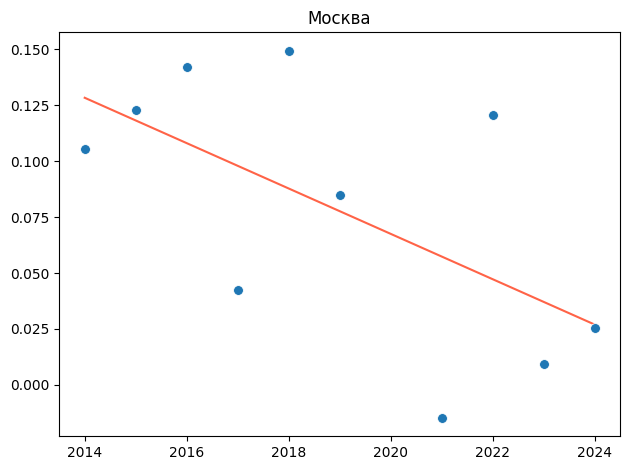

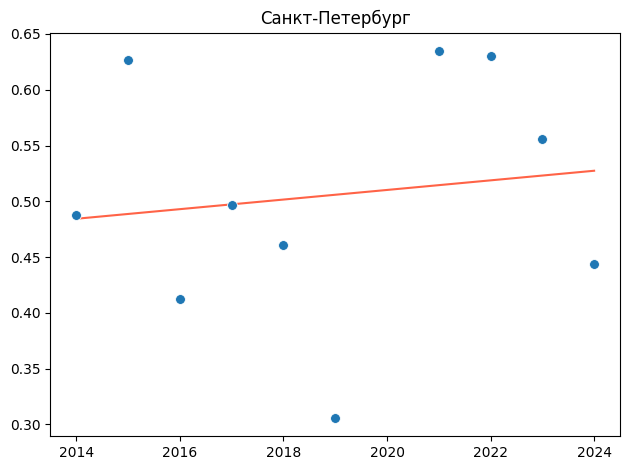

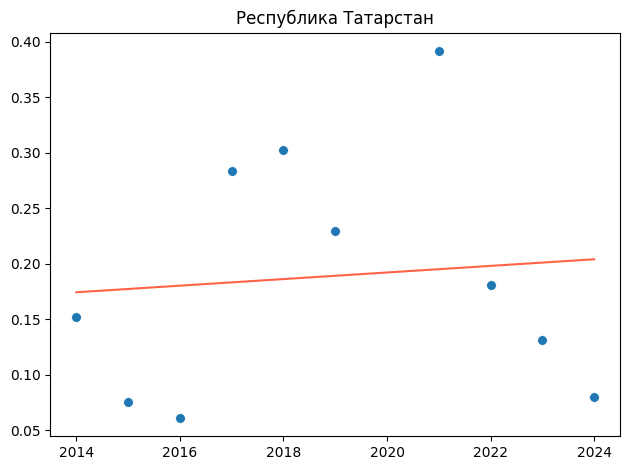

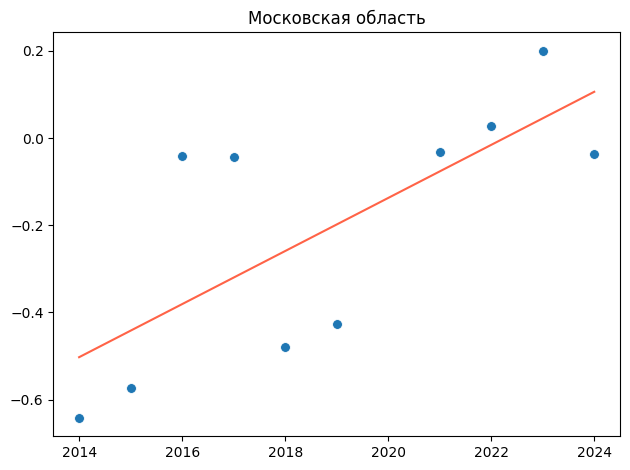

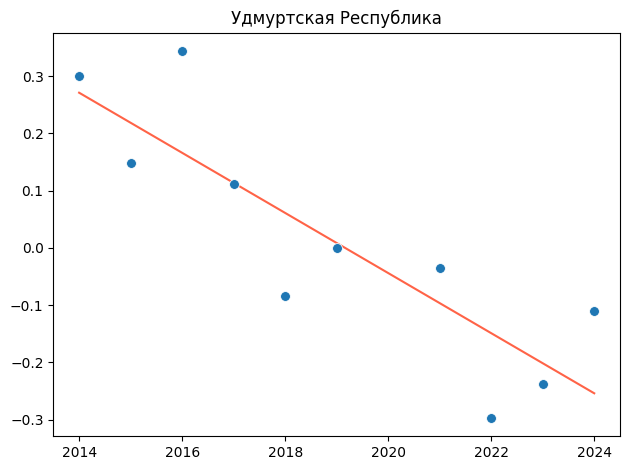

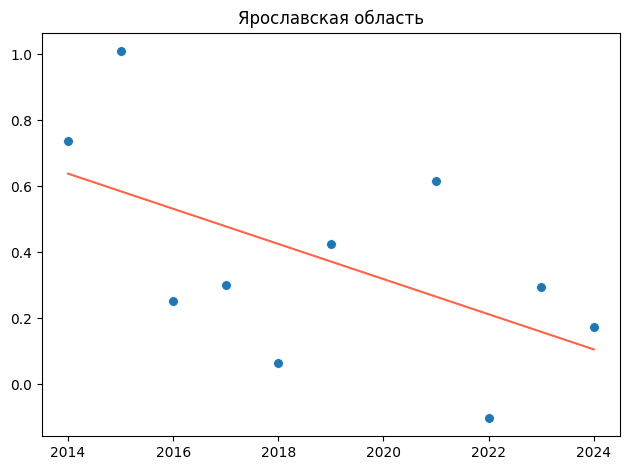

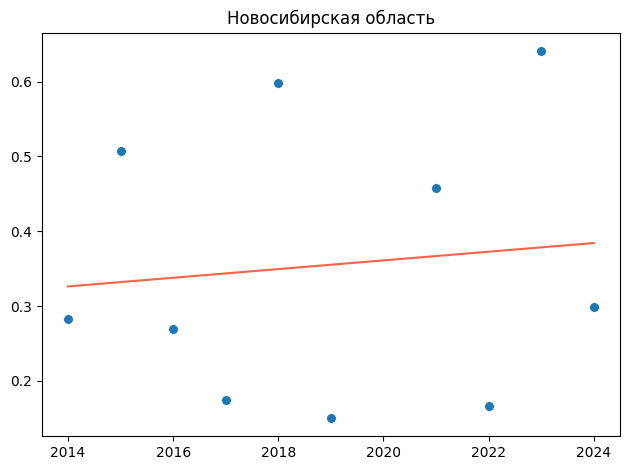

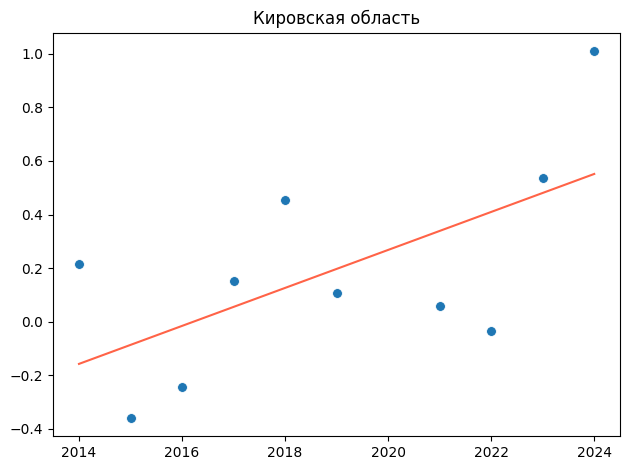

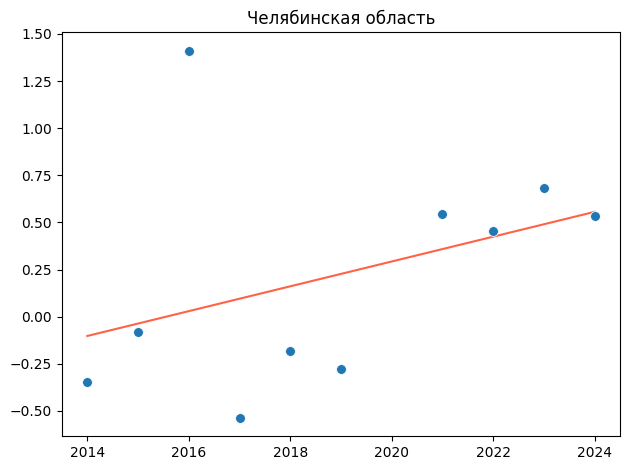

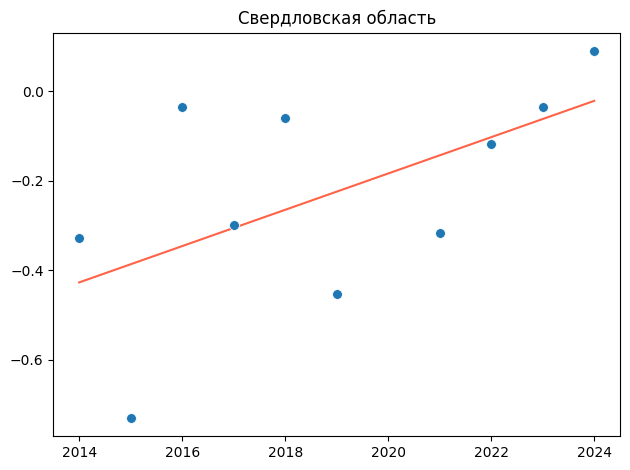

In [334]:
for region in df_normalized_regions_dict:
  coefficients = np.polyfit(df_normalized_regions_dict[region].index, df_normalized_regions_dict[region], deg=1)
  trend_line = np.poly1d(coefficients)

  plt.plot(df_normalized_regions_dict[region].index, trend_line(df_normalized_regions_dict[region].index), color='tomato', zorder=1)
  sns.scatterplot(x=df_normalized_regions_dict[region].index, y=df_normalized_regions_dict[region], s=50, zorder=2)

  plt.title(region)
  plt.xlabel('')
  plt.ylabel('')
  plt.tight_layout()
  plt.show()

In [335]:
stat_data_regions_score = pd.DataFrame(index = subjects_distribution_top_10, columns=['r2', 'f_pvalue', 'coef'])
for region in df_normalized_regions_dict:
  print(region)
  print('-'*100)
  data = df_normalized_regions_dict[region].reset_index().rename(columns={'Год олимпиады': 'year', 'Баллы': 'score'})
  data['year'] -= 2014
  results1 = smf.ols('score ~ year', data=data).fit()
  stat_data_regions_score.loc[region, 'r2'] = results1.rsquared
  stat_data_regions_score.loc[region, 'f_pvalue'] = results1.f_pvalue
  stat_data_regions_score.loc[region, 'coef'] = results1.params['year']
  display(results1.summary())
  print('-'*100)

Москва
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     4.465
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0676
Time:                        23:59:13   Log-Likelihood:                 16.870
No. Observations:                  10   AIC:                            -29.74
Df Residuals:                       8   BIC:                            -29.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1284      0.028      4.528      0.002       0.063       0.194
year          -0.0101      0.005     -2.113      0.068      -0.021       0.001
==============================================================================
Omnibus:                        0.221   Durbin-Watson:                   3.237
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.389
Skew:                           0.096   Prob(JB):                        0.823
Kurtosis:                       2.053   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Санкт-Петербург
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.103
Method:                 Least Squares   F-statistic:                    0.1581
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.701
Time:                        23:59:13   Log-Likelihood:                 8.7336
No. Observations:                  10   AIC:                            -13.47
Df Residuals:                       8   BIC:                            -12.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4843      0.064      7.574      0.000       0.337       0.632
year           0.0043      0.011      0.398      0.701      -0.021       0.029
==============================================================================
Omnibus:                        0.350   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.375
Skew:                          -0.332   Prob(JB):                        0.829
Kurtosis:                       2.323   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Республика Татарстан
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.115
Method:                 Least Squares   F-statistic:                   0.07009
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.798
Time:                        23:59:13   Log-Likelihood:                 8.3786
No. Observations:                  10   AIC:                            -12.76
Df Residuals:                       8   BIC:                            -12.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1744      0.066      2.631      0.030       0.022       0.327
year           0.0030      0.011      0.265      0.798      -0.023       0.029
==============================================================================
Omnibus:                        1.041   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.802
Skew:                           0.458   Prob(JB):                        0.670
Kurtosis:                       1.958   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Московская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     8.552
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0192
Time:                        23:59:14   Log-Likelihood:                 2.1963
No. Observations:                  10   AIC:                           -0.3926
Df Residuals:                       8   BIC:                            0.2126
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5025      0.123     -4.087      0.003      -0.786      -0.219
year           0.0609      0.021      2.924      0.019       0.013       0.109
==============================================================================
Omnibus:                        1.477   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                0.940
Skew:                           0.466   Prob(JB):                        0.625
Kurtosis:                       1.822   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Удмуртская Республика
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     22.62
Date:                Fri, 28 Feb 2025   Prob (F-statistic):            0.00143
Time:                        23:59:14   Log-Likelihood:                 8.5311
No. Observations:                  10   AIC:                            -13.06
Df Residuals:                       8   BIC:                            -12.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2711      0.065      4.155      0.003       0.121       0.422
year          -0.0525      0.011     -4.756      0.001      -0.078      -0.027
==============================================================================
Omnibus:                        0.228   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.892   Jarque-Bera (JB):                0.387
Skew:                           0.199   Prob(JB):                        0.824
Kurtosis:                       2.122   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Ярославская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     3.646
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0926
Time:                        23:59:14   Log-Likelihood:               -0.71952
No. Observations:                  10   AIC:                             5.439
Df Residuals:                       8   BIC:                             6.044
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6381      0.165      3.877      0.005       0.259       1.018
year          -0.0532      0.028     -1.909      0.093      -0.117       0.011
==============================================================================
Omnibus:                        0.971   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.633
Skew:                           0.108   Prob(JB):                        0.729
Kurtosis:                       1.786   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Новосибирская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                   0.09878
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.761
Time:                        23:59:14   Log-Likelihood:                 3.4007
No. Observations:                  10   AIC:                            -2.801
Df Residuals:                       8   BIC:                            -2.196
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3262      0.109      2.993      0.017       0.075       0.578
year           0.0058      0.018      0.314      0.761      -0.037       0.048
==============================================================================
Omnibus:                        2.333   Durbin-Watson:                   3.419
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                0.992
Skew:                           0.319   Prob(JB):                        0.609
Kurtosis:                       1.594   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Кировская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     4.961
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0565
Time:                        23:59:14   Log-Likelihood:                -2.0506
No. Observations:                  10   AIC:                             8.101
Df Residuals:                       8   BIC:                             8.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1571      0.188     -0.836      0.428      -0.591       0.276
year           0.0709      0.032      2.227      0.057      -0.003       0.144
==============================================================================
Omnibus:                        1.658   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                0.793
Skew:                           0.166   Prob(JB):                        0.673
Kurtosis:                       1.661   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Челябинская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.339
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.281
Time:                        23:59:14   Log-Likelihood:                -7.8593
No. Observations:                  10   AIC:                             19.72
Df Residuals:                       8   BIC:                             20.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1021      0.336     -0.304      0.769      -0.877       0.673
year           0.0658      0.057      1.157      0.281      -0.065       0.197
==============================================================================
Omnibus:                       11.411   Durbin-Watson:                   2.415
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                5.128
Skew:                           1.477   Prob(JB):                       0.0770
Kurtosis:                       4.891   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------
Свердловская область
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     3.976
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0813
Time:                        23:59:14   Log-Likelihood:                 2.4269
No. Observations:                  10   AIC:                           -0.8538
Df Residuals:                       8   BIC:                           -0.2486
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4272      0.120     -3.555      0.007      -0.704      -0.150
year           0.0406      0.020      1.994      0.081      -0.006       0.087
==============================================================================
Omnibus:                        0.223   Durbin-Watson:                   2.706
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.363
Skew:                          -0.245   Prob(JB):                        0.834
Kurtosis:                       2.205   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------------------------------------------------------


In [336]:
stat_data_regions_score.sort_values(['r2'], ascending=False)

,r2,f_pvalue,coef
Субъект РФ,,,
Удмуртская Республика,0.738701,0.001435,-0.052531
Московская область,0.516675,0.019162,0.060863
Кировская область,0.382749,0.056538,0.070881
Москва,0.358185,0.06756,-0.010138
Свердловская область,0.332017,0.081258,0.040555
Ярославская область,0.313061,0.092615,-0.053193
Челябинская область,0.143396,0.280556,0.065835
Санкт-Петербург,0.019382,0.701291,0.004304
Новосибирская область,0.012197,0.761339,0.005799


Как и по прошлому показателю статистически значимого отличия коэффициента детерминации от нуля для топ 3 регионов нет. Для Московской области $R^2=0.517$ с p-value 0.0192. Это значит что есть корелляция между средним нормализованным баллом и годом олимпиады, в среднем за год нормализованный балл увеличивается на 0.0609. Это значит, что на фоне других регионов Московская область улучшает свои позиции по выступлениям на олимпиаде. Для Удмуртской Республики $R^2=0.739$ с p-value 0.001. Наблюдается довольно значимая отрицательая корреляция. За год средний нормализованный балл уменьшается на 0.0525. Значит на фоне других регионов Удмуртская Республика ухудшает свои позиции по олимпиаде.

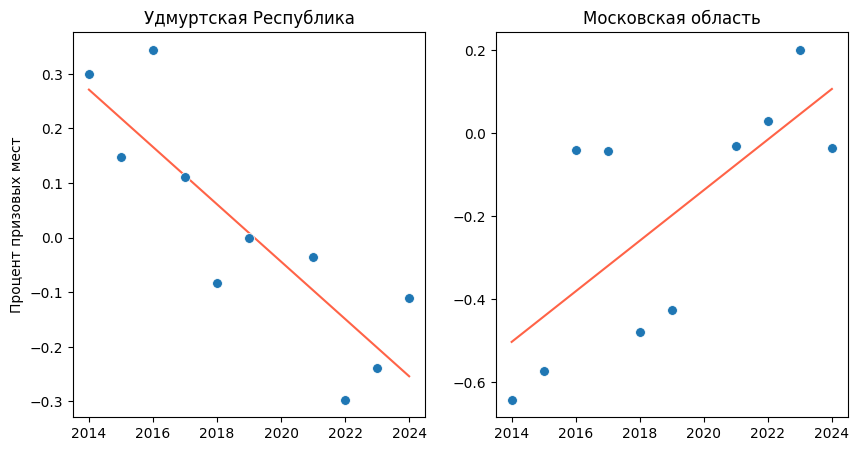

In [337]:
names_reg = ['Удмуртская Республика', 'Московская область']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for ax, region in zip(axes, names_reg):
    coefficients = np.polyfit(df_normalized_regions_dict[region].index, df_normalized_regions_dict[region], deg=1)
    trend_line = np.poly1d(coefficients)

    ax.plot(df_normalized_regions_dict[region].index, trend_line(df_normalized_regions_dict[region].index), color='tomato', zorder=1)

    sns.scatterplot(x=df_normalized_regions_dict[region].index, y=df_normalized_regions_dict[region], s=50, zorder=2, ax=ax)

    ax.set_title(region)
    ax.set_xlabel('')
    if ax == axes[0]:
      ax.set_ylabel('Процент призовых мест')
    else:
      ax.set_ylabel('')

### Распределение учеников по школам в топ 5 регионах

Проанализируем как распределены ученики по школам в топ 5 регионах по количеству участников. Т.е. будут проанализированы регионы:

In [338]:
subjects_distribution_top_5 = subjects_distribution_top_10[:5]
subjects_distribution_top_5

,Субъект РФ
0,Москва
1,Санкт-Петербург
2,Республика Татарстан
3,Московская область
4,Удмуртская Республика


В колонке Образовательное учреждение есть пропущенные значения в виде пустых строк, будем такие наблюдения игнорировать

In [339]:
schools_dict = {region: df[(df['Субъект РФ'] == region) & (df['Образовательное учреждение'] != '')]['Образовательное учреждение'].value_counts().reset_index() for region in subjects_distribution_top_5}

In [340]:
schools_top_rename = {'Государственное бюджетное общеобразовательное учреждение города Москвы "Лицей "Вторая школа"': 'Лицей "Вторая школа"',
                      'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа № 179"': 'Школа № 179',
                      'Государственное бюджетное общеобразовательное учреждение города Москвы "Пятьдесят седьмая школа': 'Школа № 57',
                      'Специализированный учебно-научный центр (факультет) – школа-интернат имени А.Н.Колмогорова Московского государственного университета имени М.В.Ломоносова': 'СУНЦ МГУ',
                      'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа № 2007 ФМШ"': 'Школа № 2007 ФМШ',
                      'Государственное бюджетное общеобразовательное учреждение города Москвы "Школа № 1329"': 'Школа № 1329',
                      'Государственное бюджетное общеобразовательное учреждение "Президентский физико-математический лицей № 239"': 'Лицей № 239',
                      'Государственное бюджетное общеобразовательное учреждение лицей № 533 "Образовательный комплекс "Малая Охта" Красногвардейского района Санкт- Петербурга': 'лицей № 533',
                      'Государственное бюджетное общеобразовательное учреждение "Санкт-Петербургский губернаторский физико-математический лицей № 30"': 'Лицей № 30',
                      'Муниципальное автономное общеобразовательное учреждение "Лицей №131" Вахитовского района г. Казани': 'Лицей №131',
                      'Муниципальное бюджетное общеобразовательное учреждение "Гимназия № 26", Республика Татарстан, г. Набережные Челны': 'Гимназия № 26',
                      'Общеобразовательная школа-интернат "Лицей имени Н.И. Лобачевского" федерального государственного автономного образовательного учреждения высшего образования "Казанский (Приволжский) федеральный университет"': '"Лицей имени Н.И. Лобачевского" КФУ',
                      'Специализированный учебный научный центр – общеобразовательная школа-интернат "IT- лицей" федерального государственного автономного образовательного учреждения высшего образования "Казанский (Приволжский) федеральный университет"': 'IT-лицей КФУ',
                      'Муниципальное автономное общеобразовательное учреждение "Лицей- интернат №2" Московского района г. Казани': 'Лицей- интернат №2',
                      'Автономное общеобразовательное учреждение муниципального образования г. Долгопрудного физико-математический лицей № 5, городской округ Долгопрудный': 'Лицей № 5',
                      'Автономная некоммерческая общеобразовательная организация "Физтех-лицей" имени П.Л. Капицы': 'Физтех-лицей',
                      'Муниципальное общеобразовательное учреждение Гимназия №1, Московская область, городской округ Жуковский': 'Гимназия №1',
                      'Муниципальное общеобразовательное учреждение лицей № 14': 'Лицей № 14',
                      'Муниципальное бюджетное общеобразовательное учреждение экономико-математический лицей №29': 'Лицей №29',
                      'Муниципальное бюджетное общеобразовательное учреждение "Лицей № 41", город Ижевск': 'Лицей № 41'
                      }
schools_top_len = {'Москва': 6,
                   'Санкт-Петербург': 3,
                   'Республика Татарстан': 5,
                   'Московская область': 4,
                   'Удмуртская Республика': 2}

In [341]:
for region in subjects_distribution_top_5:
  schools_dict[region]['Образовательное учреждение'] = schools_dict[region]['Образовательное учреждение'].replace(schools_top_rename)

In [342]:
for region in subjects_distribution_top_5:
  school_region_grouped = schools_dict[region][:schools_top_len[region]]
  other_schools_count = schools_dict[region][schools_top_len[region]:]['count'].sum()
  school_region_grouped = (pd.concat([school_region_grouped, pd.DataFrame({'Образовательное учреждение': ['Другие'], 'count': other_schools_count})])
                                .reset_index(drop=True)
  )
  schools_dict[region] = school_region_grouped

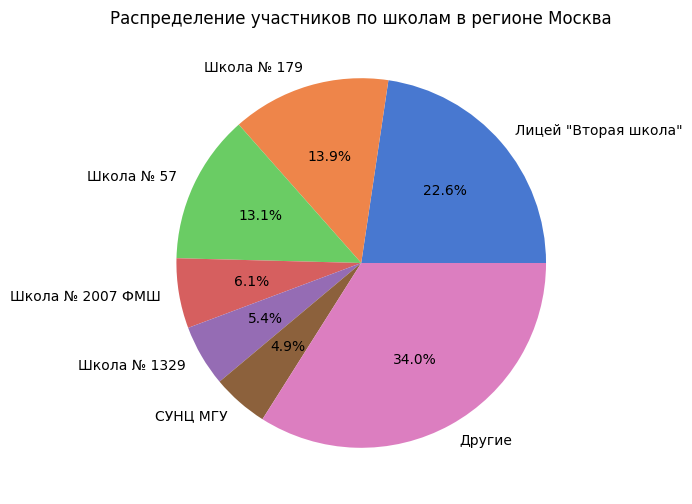

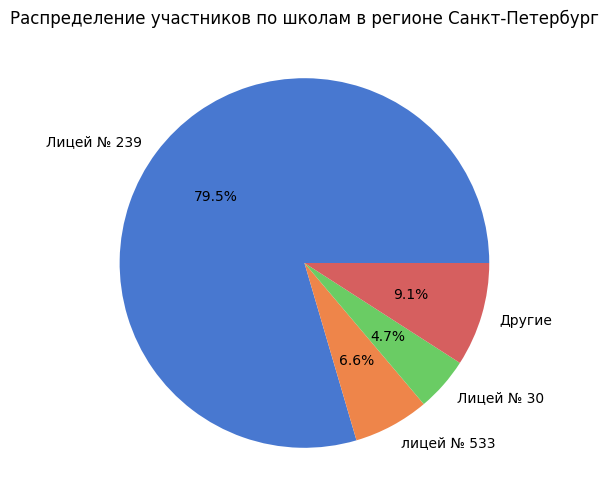

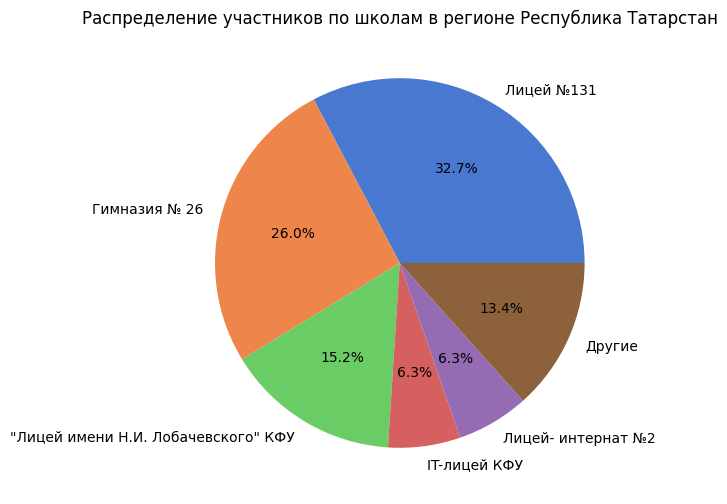

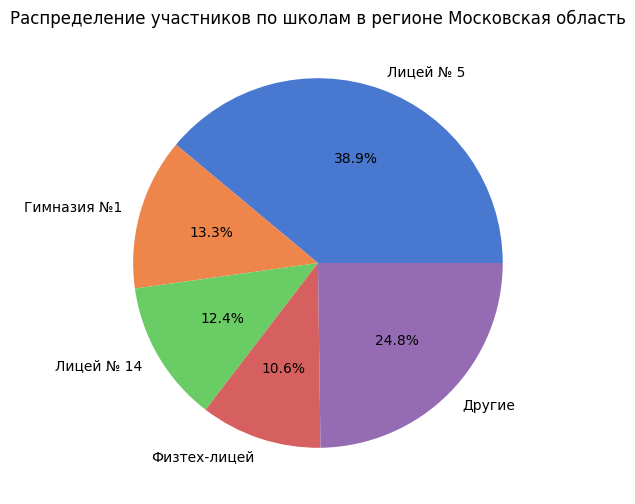

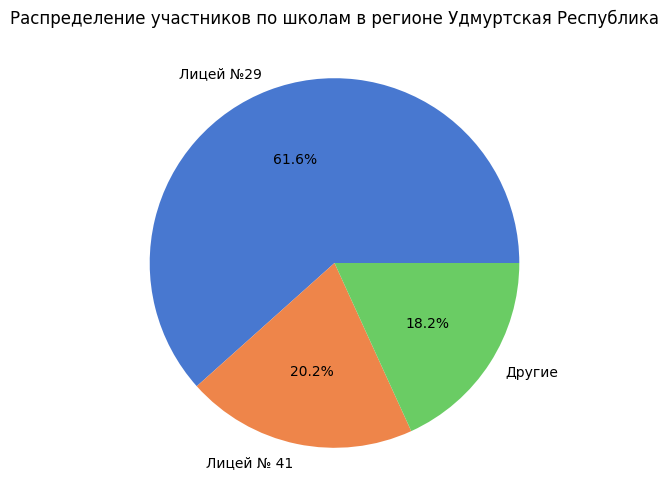

In [343]:
for region in subjects_distribution_top_5:
  plt.figure(figsize=(6, 6))
  plt.pie(schools_dict[region]['count'], labels=schools_dict[region]['Образовательное учреждение'], autopct='%1.1f%%', colors=colors_base)

  plt.title(f"Распределение участников по школам в регионе {region}")
  plt.show()

Распределение участников по школам в разных регионах сильно различается:


1.   Москва. Есть много школ, ученики которых становятся участниками олимпиады. Есть школы с большим количеством участников, например Лицей "Вторая Школа", но всё равно участники распределены более менее равномерно.
2.   Санкт-Петербург. Явное преобладание участников из одной школы: Лицей № 239,почти 80% участников из региона учатся в этой школе. Ещё 10% учатся в лицеях № 533 и 30, остальные же 10% распределены по разным школам.
3.   Республика Татарстан. Есть 2 школы с наибольшим количеством участников: Лицей №131 и Гимназия №26. Но в целом участники распределены равномерно по школам.
4.   Московская область. Есть школа с почти 40% количеством участников - Лицей № 5. Есть ещё 3 школы, с примерно одинаковым количеством участников 10-13%, остальные 25% участников распределены по другим школам.
5.   Удмуртская республика. Явное преобладание участников из одной школы: Лицей № 29, 62% участников. Также есть Лицей №41, в котором распределены 20% участников, остальные 18% распределены по другим школам.

Таким образом можно выделить два типа регионов: однородные и неоднородные по распределению учеников в школах. К однородным относятся Москва и Республика Татарстан. Московская область занимает промежуточное положение между однородными и неоднородными, так как есть преобладание одной школы, но есть еще несколько представленных равномерно школ. К неоднородным относятся Санкт-Петербург и Удмуртская Республика.

Однородность школ по Москве объясняется тем, что это самый крупный город, в котором очень много школ. И среди них есть несколько с высоким уровнем подготовки. В Республике Татарстан, помимо  Казани есть крупный город Набережные Челны в котором тоже хорошо развито олимпиадное движение по математике. Преобладание одной школы в Санкт-Петербурге возможно объясняется тем, что лицей № 239 основан давно, и много лет ученики показывают высокие результаты на олимпиадах. Также многие школьники из других городов приезжают учится в этот лицей, так как он имеет статус одного из самых лучших по уровню математического образования. Неоднородность распределение в Удмуртской Республике скорее всего объясняется тем, что там нету городов по населению сравнимых с Ижевском, следующий по населению город почти в 6 раз меньше. Поэтому также тут преобладает 1-2 школы.



### Регионы с самым большим оттоком/притоком учеников

Рассмотрим случаи, когда ученики переезжают в другой регион и участвуют в олимпиаде уже в новом регионе.

In [344]:
names_subjects_grouped_travelers = names_subjects_grouped[names_subjects_grouped.apply(lambda x: len(set(x)) != 1 )]
names_subjects_grouped_travelers = pd.DataFrame(names_subjects_grouped_travelers)

In [345]:
def get_region_course(regions):
  return [f'{regions[i]}_{regions[i + 1]}' for i, region in enumerate(regions) if i < len(regions) - 1 and regions[i] != regions[i + 1]]

In [346]:
names_subjects_grouped_travelers['courses'] = names_subjects_grouped_travelers['Субъект РФ'].apply(get_region_course)

In [347]:
names_subjects_grouped_travelers['Субъект РФ']

,Субъект РФ
Полное имя,
Алимаскин Максим Алексеевич,"[Белгородская область, Москва]"
Андрианова Анастасия Михайловна,"[Ивановская область, Санкт-Петербург]"
Андрийчук Михаил Олегович,"[Санкт-Петербург, Москва, Москва]"
Бовкун Тимофей Дмитриевич,"[Республика Башкортостан, Республика Башкортос..."
Большаков Михаил Александрович,"[Нижегородская область, Санкт-Петербург]"
...,...
Шарипов Камиль Ниязович,"[Республика Татарстан, Республика Татарстан, М..."
Щавелев Владимир Эдуардович,"[Новосибирская область, Санкт-Петербург, Новос..."
Щенников Григорий Олегович,"[Кировская область, Санкт-Петербург, Санкт-Пет..."


In [348]:
all_courses = names_subjects_grouped_travelers['courses'].explode().value_counts().reset_index()

Самые популярные маршруты перехода из одного региона в другой:

In [349]:
all_courses.head(14)

,courses,count
0,Республика Татарстан_Москва,9
1,Новосибирская область_Санкт-Петербург,6
2,Санкт-Петербург_Москва,5
3,Нижегородская область_Санкт-Петербург,5
4,Краснодарский край_Москва,4
5,Удмуртская Республика_Москва,4
6,Краснодарский край_Санкт-Петербург,4
7,Нижегородская область_Москва,3
8,Свердловская область_Москва,3
9,Волгоградская область_Москва,2


Получим регионы, из которых больше всего переходят, и в которые больше всего переходят

In [350]:
all_courses['start'] = all_courses['courses'].apply(lambda x: x.split('_')[0])
all_courses['final'] = all_courses['courses'].apply(lambda x: x.split('_')[1])

In [351]:
start_regions_count = all_courses.groupby('start')['count'].sum().sort_values(ascending=False)
finish_regions_count = all_courses.groupby('final')['count'].sum().sort_values(ascending=False)

Топ регионов по оттоку учеников:

In [353]:
start_regions_count.head(10)

,count
start,
Республика Татарстан,10
Краснодарский край,9
Нижегородская область,9
Новосибирская область,7
Санкт-Петербург,6
Свердловская область,4
Удмуртская Республика,4
Москва,3
Ивановская область,3


Топ регионов по притоку учеников:

In [354]:
finish_regions_count

,count
final,
Москва,55
Санкт-Петербург,26
Московская область,4
Республика Татарстан,2
Ненецкий автономный округ,1
Новосибирская область,1
Республика Башкортостан,1
Республика Мордовия,1


Топ 5 регионов по абсолютному количеству переездов из региона: Республика Татарстан, Краснодарский край, Нижегородская область, Новосибирская область, Санкт-Петербург. Больше всего переезжают в Москву и Санкт-Петербург. В остальные регионы практически не переезжают

Эти результаты были получены в абсолютной шкале, сравнивалось количество учеников. Можно рассматривать долю учеников относительно всех участников в регионе. Так можно будет узнать интенсивность оттока/притока учеников в относительной шкале

In [355]:
subjects_distribution_dict = {subject: subjects_distribution.loc[subjects_distribution['Субъект РФ'] == subject, 'count'].iloc[0] for subject in subjects_distribution['Субъект РФ']}

In [356]:
start_regions_count = pd.DataFrame(start_regions_count).reset_index()
finish_regions_count = pd.DataFrame(finish_regions_count).reset_index()
start_regions_count['total'] = start_regions_count.reset_index()['start'].map(subjects_distribution_dict)
finish_regions_count['total'] = finish_regions_count.reset_index()['final'].map(subjects_distribution_dict)
start_regions_count['rel'] = (start_regions_count['count'] / start_regions_count['total'] * 100).round(1)
finish_regions_count['rel'] = (finish_regions_count['count'] / finish_regions_count['total'] * 100).round(1)
start_regions_count = start_regions_count.sort_values(by='rel', ascending=False)
finish_regions_count = finish_regions_count.sort_values(by='rel', ascending=False)

In [368]:
start_regions_count[start_regions_count['total'] >= 50][['rel']].set_index(start_regions_count[start_regions_count['total'] >= 50]['start'])

,rel
start,
Краснодарский край,12.7
Нижегородская область,12.3
Новосибирская область,7.6
Свердловская область,5.3
Удмуртская Республика,3.7
Республика Башкортостан,3.6
Республика Татарстан,3.3
Ульяновская область,2.6
Челябинская область,2.2


In [369]:
finish_regions_count[finish_regions_count['total'] >= 100][['rel']].set_index(finish_regions_count[finish_regions_count['total'] >= 100]['final'])

,rel
final,
Москва,4.2
Санкт-Петербург,4.2
Московская область,3.0
Республика Татарстан,0.7


Здесь оставлены субъекты с более менее большим количеством участников, иначе выбросы сильно искажают статистику.

Лидеры по относительному оттоку учеников: Краснодарский край - 12.7 %, Нижегородская область - 12.3 %, Новосибирская область - 7.6 %, Свердловская область - 5.3 %, Удмуртская Республика - 3.7 %.
Лидеры по относительному притоку учеников: Москва - 4.2 % и Санкт-Петербург - 4.2 %

### Улучшается ли результат после переезда в более крупный регион

Рассмотрим меняются ли баллы ученика после переезда в более крупный регион. Чтобы корректно сравнивать баллы, проведём z - нормализацию баллов для каждого года и класса.

In [210]:
df_normalized_2 = df.copy()
df_normalization_rules_2 = df_normalized_2.groupby(['Год олимпиады', 'Класс участия'])['Баллы'].agg(['mean', 'std'])

In [211]:
df_normalization_dict_2 = {ind: df_normalization_rules_2.loc[ind].to_list() for ind in df_normalization_rules_2.index}

In [212]:
df_normalized_2['Баллы'] = (
    (df_normalized_2['Баллы'] - df_normalized_2.apply(lambda row: df_normalization_dict_2[(row['Год олимпиады'], row['Класс участия'])][0], axis=1))
     / df_normalized_2.apply(lambda row: df_normalization_dict_2[(row['Год олимпиады'], row['Класс участия'])][1], axis=1)
    )

Далее найдём учеников, которые переезжали в Москву или Санкт-Петербург (так как это самые популярные регионы) и получим баллы до переезда и после. При этом оставим только случаи переезда из не очень крупных регионов, т.е. не рассматриваем случаи переезда из Москвы и Санкт-Петербурга. Это позволит проверить, влияет ли переезд из не очень крупного региона в крупный регион на количество баллов

In [213]:
names_subjects_grouped_2 = df_normalized_2.sort_values(by='Год олимпиады').groupby('Полное имя')[['Субъект РФ', 'Баллы']].agg({'Субъект РФ': list, 'Баллы': list})
names_subjects_grouped_travelers_2 = names_subjects_grouped_2[names_subjects_grouped_2['Субъект РФ'].apply(lambda x: len(set(x)) != 1 )].copy()

Чтобы не усложнять анализ, оставим только учеников, которые переехали только 1 раз, таких большинство. Будем анализировать баллы до переезда и сразу после переезда

In [214]:
names_subjects_grouped_travelers_2['courses'] = names_subjects_grouped_travelers_2['Субъект РФ'].apply(get_region_course)
names_subjects_grouped_travelers_2 = names_subjects_grouped_travelers_2.loc[names_subjects_grouped_travelers_2['courses'].apply(lambda x: len(x)) == 1]

In [215]:
def get_scores(reg_scores):
  for i, tup in enumerate(reg_scores):
    if i < len(reg_scores) - 1 and reg_scores[i][0] != reg_scores[i + 1][0] and reg_scores[i][0] not in ['Москва', 'Санкт-Петербург']:
      return (reg_scores[i][1], reg_scores[i + 1][1])
    return np.nan

In [216]:
names_subjects_grouped_travelers_2_tmp = names_subjects_grouped_travelers_2.apply(lambda row: list(zip(row['Субъект РФ'], row['Баллы'])), axis=1).apply(get_scores)
names_subjects_grouped_travelers_2_tmp = pd.DataFrame(names_subjects_grouped_travelers_2_tmp).rename(columns={0: 'tuple'}).dropna()

In [217]:
names_subjects_grouped_travelers_2_tmp['before'] = names_subjects_grouped_travelers_2_tmp['tuple'].apply(lambda x: x[0])
names_subjects_grouped_travelers_2_tmp['after'] = names_subjects_grouped_travelers_2_tmp['tuple'].apply(lambda x: x[1])
names_subjects_grouped_travelers_2_tmp['check'] = names_subjects_grouped_travelers_2_tmp['after'] > names_subjects_grouped_travelers_2_tmp['before']

In [218]:
score_before, score_after = names_subjects_grouped_travelers_2_tmp['before'].values, names_subjects_grouped_travelers_2_tmp['after'].values

Средние значения выборок:

In [219]:
print(f'До переезда: {score_before.mean():.2f}')
print(f'После переезда: {score_after.mean():.2f}')
print(f'Разница: {(score_after.mean() - score_before.mean()):.2f}')

До переезда: 0.00
После переезда: 0.26
Разница: 0.26


Построим boxplot для этих выборок

<ipython-input-220-33938f4f1138>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([score_before, score_after], labels=['До переезда', 'После переезда'])


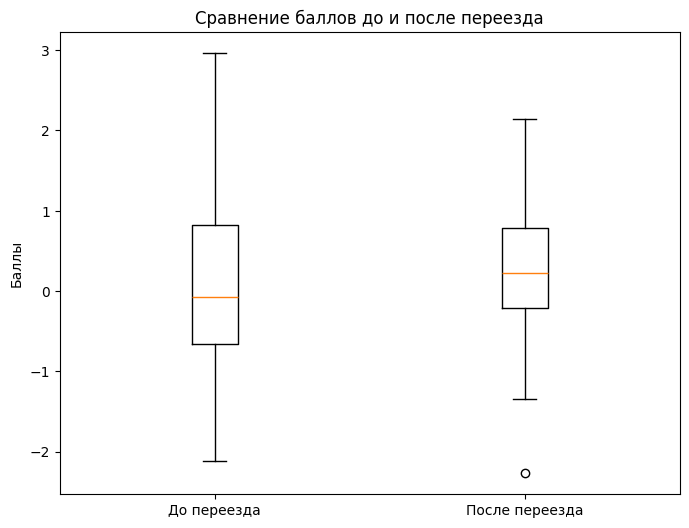

In [220]:
plt.figure(figsize=(8, 6))
plt.boxplot([score_before, score_after], labels=['До переезда', 'После переезда'])
plt.title('Сравнение баллов до и после переезда')
plt.xlabel('')
plt.ylabel('Баллы')
plt.show()

Проверим выборки из баллов на нормальность с помощью критерия Шапиро-Уилка

In [221]:
stats.shapiro(score_before)

ShapiroResult(statistic=0.9878951953754912, pvalue=0.7784815665716889)

In [222]:
stats.shapiro(score_after)

ShapiroResult(statistic=0.9873123171602611, pvalue=0.7470504219415612)

Так как p-value больше уровня значимости, нет основания отклонить гипотезу о нормальности выборок. Так как это выборки баллов учеников до и после переезда, то они зависимые. Для сравнения средних значений выборок используем t-критерий Стьюдента для двух зависимых выборок

In [223]:
stats.ttest_rel(score_before, score_after)

TtestResult(statistic=-1.9030948703445736, pvalue=0.0615279405667213, df=64)

p-value больше 0.05, поэтому гипотезу о равенстве средних нет оснований отвергать. Однако, значение p-value не сильно далеко от 0.05, что может означать, что всё-таки некоторое влияние может оказываться.

Для контроля выберем учеников не из Москвы и Санкт-Петербурга которые участовали в олимпиаде хотя бы 2 раза и не меняли регион участия. Проверим, изменяются ли баллы у этой выборки во время второго выступления. Если будет обнаружено, что у них балл увеличивается существенно меньше, чем у людей которые переезжают, имеет смысл продолжить анализ влияния переезда на балл.

In [224]:
df_control_normalized = (
    df_normalized_2[(df_normalized_2['Полное имя'].isin(names_subjects_grouped[names_subjects_grouped.apply(lambda x: len(set(x)) == 1)].index))
     & ~(df_normalized_2['Субъект РФ'].isin(['Москва', 'Санкт-Петербург']))].sort_values(by='Год олимпиады')
     .groupby('Полное имя')[['Субъект РФ', 'Баллы']].agg({'Субъект РФ': list, 'Баллы': list})
    )

In [225]:
score_before_control = df_control_normalized[df_control_normalized['Субъект РФ'].apply(lambda x: len(x) != 1)]['Баллы'].apply(lambda x: x[0])
score_after_control = df_control_normalized[df_control_normalized['Субъект РФ'].apply(lambda x: len(x) != 1)]['Баллы'].apply(lambda x: x[1])

In [226]:
print(f'Первое участие: {score_before_control.mean():.2f}')
print(f'Второе участие: {score_after_control.mean():.2f}')
print(f'Разница: {(score_after_control.mean() - score_before_control.mean()):.2f}')

Первое участие: -0.02
Второе участие: 0.16
Разница: 0.18


<ipython-input-227-ddb662d6c380>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([score_before, score_after], labels=['Первое участие', 'Второе участие'])


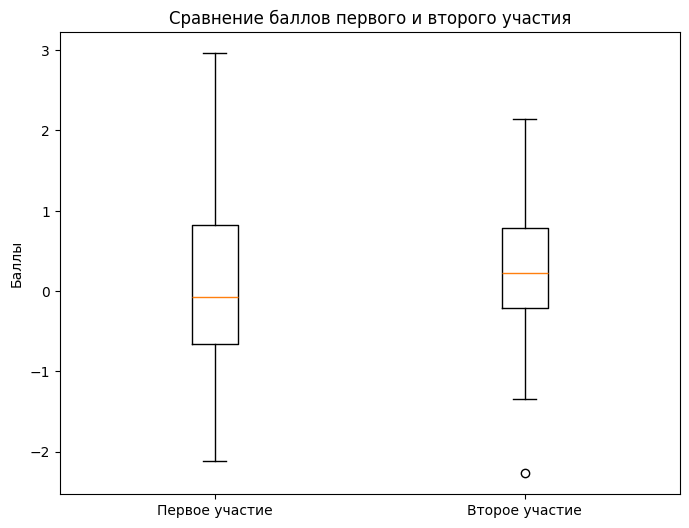

In [227]:
plt.figure(figsize=(8, 6))
plt.boxplot([score_before, score_after], labels=['Первое участие', 'Второе участие'])
plt.title('Сравнение баллов первого и второго участия')
plt.xlabel('')
plt.ylabel('Баллы')
plt.show()

In [228]:
stats.shapiro(score_before_control)

ShapiroResult(statistic=0.9970243652900365, pvalue=0.45195378171064526)

In [229]:
stats.shapiro(score_after_control)

ShapiroResult(statistic=0.9973063154605969, pvalue=0.5474237597655178)

In [230]:
stats.ttest_rel(score_before_control, score_after_control)

TtestResult(statistic=-4.591743649695676, pvalue=5.502996721102495e-06, df=527)

p-value практически 0, поэтому отвергаем гипотезу о равенстве средних в обеих выборках. Это значит, что во время второго участия у учеников, которые не переезжали в другой регион, нормализованный балл повышается в среднем на 0.18. В выборке из учеников, которые переезжали, изменение было 0.26 но это был статистически не значимый результат. Поэтому можно заключить, что переезд в другой регион никак или очень мало влияет на результат следующего выступления в олимпиаде. Зато оказывает влияние то, что человек участвует в олимпиаде не первый раз. У этого участника уже больше опыта решения задач и он закономерно показывает лучшие результаты

# Вывод

Далее будет проведён краткий вывод по всем результатам, полученным в этом блокноте.  

В данном блокноте анализировался датасет участников заключительного этапа Всероссийской олимпиады школьников по математике за 2014-2024 годы.  Целью анализа было исследование успешности выступлений учеников из разных регионов на олимпиаде.
 В результате анализа было исследование распределение признаков: Субъект РФ, Класс участия, Класс обучения, Образовательное учреждение, Баллы, Статус, Год олимпиады.

Топ регионов по числу участников это: Москва, Санкт-Петербург, Татарстан и Московская область. Количество учеников по каждому классу примерно одинаково, но число участников в 9 классе немного меньше, чем в 10 и 11, так как за 9 класс решают задачи участники в том числе из более младших классов, они составляют примерно 6% от общего числа участников. Школа с самым большим числом участников – это Президентский физико-математический лицей №239 из г. Санкт-Петербург. Баллы всех участников за все года не подчиняются нормальному распределению, но распределение не очень сильно отличается от нормального, коэффициенты асимметрии и эксцесса 0.06 и -0.17 соответственно. Среднее значение баллов: 26.7, медианное: 28, что составляет половину баллов от максимального. Среди всех учеников 60% имели статус участника, 35% призёра и 5% - победитель. Количество участников в период 2014-2019 год не сильно менялось и в среднем было 367. В 2021 году был пик по количеству участников – 516, потом это число уменьшилось, но не сильно, в среднем за период 2021-2024 число участников было 480.

Также были проанализированы взаимосвязи между значениями различных признаков.  

Было определено, как распределялись дипломы призёра и победителя в разных классах в зависимости от года. Кроме 2014 года, когда максимальное количество призовых мест было 30%, процент призовых мест после 2014 года варьировался от 37% до 47% и в среднем составлял 41%. Распределение призовых мест по классам в целом было равномерное, но в 2017 году наблюдалось сильное уменьшение количества призовых мест у 11 классов. В 2021 и 2024 годах наоборот наблюдалось сильное уменьшение количества призовых мест у 9 и 10 классов. Это говорит о том, что в эти года 11 классы хуже или лучше справлялись со своими заданиями, чем другие классы. Значит в эти годы распределение заданий по сложности в разных классах было неравномерным. И чтобы обеспечить примерное равенство разделения призовых мест в каждом классе, следует равномерно распределять задания по сложности во всех классах.  

Были проанализированы результаты из топа 10 регионов по количеству участников. Лучшими регионами по среднему количеству баллов являются: Санкт-Петербург, Ярославская область, Новосибирская область, Республика Татарстан и Челябинская область. Был также проведён аналогичный анализ по проценту призёров в каждом регионе от общего количества участников. Общее распределение практически не поменялось, но в каждом отдельном классе есть регионы, которые сильно отличаются по местам по среднему баллу и проценту призовых мест. В 9 классе Свердловская область по баллам имела 10 место, а по процентам 7. Также в 11 классе Московская область по баллам имела 9 место, а по призовым местам - 5, Удмуртская Республика по баллам - 5, а по процентам - 10. Такие различия по двум разным метрикам могут показывать различия в подготовке среднестатистических учеников(в контексте математических олимпиад) и сильных учеников. У регионов Свердловская область и Московская область результаты на основе призовых мест были лучше, чем по среднему баллу. Это значит, что в этих регионах немного хуже уровень подготовки среднестатистических учеников, но есть довольно большое количество сильных учеников, которые занимают призовые места. В Удмуртской Республике – наоборот, подготовка среднестатистических учеников лучше, но сильных учеников не так много. Была проанализирована динамика результатов выступлений для каждого региона. Сравнение также проводилось по двум метрикам – процент призеров и средний балл. Но для среднего балла была проведена z-нормализация, чтобы учесть, что в разные годы сложность могла изменяться. В результате было получено, что Московская область показывает статистически значимую положительную динамику, и в среднем её нормализованный балл за год увеличивается на 0.06. Если в 2014 году он составлял около -0.6, то в 2024 он стал уже около 0. То есть регион достиг среднего результата по стране. Удмуртская Республика, наоборот, показывает ухудшение результатов с течением времени. За год средний нормализованный балл уменьшается на 0.05. В 2014 году он составлял 0.3, а в период 2022-2024 менялся в пределах от -0.3 до -0.1.  

Было проанализировано распределение учеников по школам в топ 5 регионах по количеству участников. В Москве и Республике Татарстан распределение получилось более-менее однородным, есть много школ, в которых есть много участников олимпиады. В Московской области распределение более неоднородно, есть более крупная школа относительно остальных, но всё еще сохраняется общая однородность по школам. В Удмуртской Республике есть одна явно преобладающая школа, и другая менее крупная, поэтому распределение школ довольно неоднородно. Самое неоднородное распределение наблюдается в Санкт-Петербурге, там почти 80% учеников из одной школы. Такие особенности распределения связаны с самим устройством городов и их населением. В Москве много людей и много хороших школ, каждая из которых готовит достаточное количество подготовленных учеников. В Республике Татарстан тоже есть помимо центра, крупные города, в которых также осуществляется подготовка способных учеников. В Удмуртской Республике разница по населению между центром и другими городами слишком большая, и сам центр не такой большой город. Поэтому в нём мало школ, которые готовят участников олимпиад и все они преимущественно из одной – двух школ. В Санкт-Петербурге преобладающая школа – лицей №239 является одним из старейших и престижнейших школ в стране. Туда много приезжают учиться из других регионов, и за счёт этого очень много учеников из Санкт-Петербурга обучаются именно в этой школе.  

Был рассмотрен вопрос об определении регионов, откуда больше всего уезжают участники олимпиады, и куда больше всего приезжают. Топ регионов по оттоку учеников это: Республика Татарстан, Краснодарский край и Нижегородская область. Топ по оттоку учеников: Москва и Санкт-Петербург. Также были проанализированы аналогичные показатели, но не в абсолютной шкале, а в относительной – процент учеников уезжающих/приезжающих в регион относительно всех участников в регионе. По этому показателю в топе по оттоку оказались регионы: Краснодарский Край, Нижегородская область и Новосибирская область. Топ по притоку — это опять Москва и Санкт-Петербург, причём доля притока у них практически одинаковая. Было также проанализировано влияет ли переезд ученика из не очень крупного региона в крупный регион, такой как Москва или Санкт-Петербург. Было получено, что среднее значение нормализованного балла ученика до и после переезда составляет 0 и 0.26 соответственно. Но исходя из статистического теста сравнения средних в двух выборках было получено, что статистически результат не значим, и мы не можем отвергнуть гипотезу о равенстве средних. Для интерпретации результата была также проанализирована выборка учеников, которые не меняли регион выживания, и было проведено сравнение первого выступления ученика и второго. Средние значения оказались равны -0.02 и 0.16 соответственно. Для этих выборок тоже был проведён статистический тест, и он показал, что в этих двух выборках средние различаются. Это значит, что после первого выступления на олимпиаде, средний нормализованный балл увеличивается на 0.18 во время второго выступления. Это логично, так как ученик набирается опыта и успешнее справляется с заданиями. Таким образом разница которая наблюдалась после переезда в другой регион на самом деле полностью или практически полностью определяется тем, что участник набирается опыта в участии в олимпиадах, а сам факт переезда в более крупный регион не влияет на результат.

